In [1]:
#Find a way to label maps with state names or abbreviations and/OR have a chart showing which states have hazardous days, etc.
#Delete final maps with quantiles
#TO DO: FINALIZE CHART TITLES
#TO DO: SAVE FIGURES WHEN COMPLETE
#ENSURE ALL VERTICAL SCROLLING IS OFF SO THAT THE CELLS CAN BE VIEWED IN ENTIRETY (cELL > CURRENT OUTPUTS > TOGGLE SCROLLING)

This study looks at annual differences in AQI between 1999, 2012, and 2020.
AQI values run from 0 to 500. The higher the AQI value, the greater the level of air pollution. Levels and color indicators are as follows: <br>
Good: 0 to 50: Green <br>
Moderate: 51 to 100: Yellow <br>
Unhealthy for Sensitive Groups: 101 to 150: Orange <br>
Unhealthy: 151 to 200: Red <br>
Very Unhealthy: 201 to 300: Purple<br>
Hazardous: 301 and above: Maroon

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
%matplotlib inline

### Read in datafiles, perform exploratory data analysis, and clean data

In [3]:
AQI0 = pd.read_csv('C:\\Users\\Mary\\CIS5898\\annual_aqi_by_county_1999.csv') #read in 1999 csv

In [4]:
print(AQI0.info()) #provides basic information on data
print(AQI0.ndim) #provides dimensions
print(AQI0.shape) #provides number of rows and number of columns 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1077 entries, 0 to 1076
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   State                                1077 non-null   object
 1   County                               1077 non-null   object
 2   Year                                 1077 non-null   int64 
 3   Days with AQI                        1077 non-null   int64 
 4   Good Days                            1077 non-null   int64 
 5   Moderate Days                        1077 non-null   int64 
 6   Unhealthy for Sensitive Groups Days  1077 non-null   int64 
 7   Unhealthy Days                       1077 non-null   int64 
 8   Very Unhealthy Days                  1077 non-null   int64 
 9   Hazardous Days                       1077 non-null   int64 
 10  Max AQI                              1077 non-null   int64 
 11  90th Percentile AQI                  1077 n

In [5]:
#There are 1077 rows and 19 columns. Because there are so many columns, look at the first five rows and first 10 columns
AQI0.iloc[:5, :10]

State    County  Year  Days with AQI  Good Days  Moderate Days  \
0  Alabama      Clay  1999            273        117             97   
1  Alabama   Colbert  1999            359        276             71   
2  Alabama    DeKalb  1999            332        134            119   
3  Alabama    Elmore  1999            241        157             71   
4  Alabama  Escambia  1999             58         57              1   

   Unhealthy for Sensitive Groups Days  Unhealthy Days  Very Unhealthy Days  \
0                                   49              10                    0   
1                                   11               1                    0   
2                                   60              19                    0   
3                                   12               1                    0   
4                                    0               0                    0   

   Hazardous Days  
0               0  
1               0  
2               0  
3               0  
4               0

In [6]:
#Look at the first five rows and next 9 columns
AQI0.iloc[:5, 11:20]

90th Percentile AQI  Median AQI  Days CO  Days NO2  Days Ozone  Days SO2  \
0                  122          58        0         0         211         0   
1                   73          11        0         0           0       284   
2                  133          59        0         0         270         0   
3                   87          45        0         0         241         0   
4                   35          20        0         0           0         0   

   Days PM2.5  Days PM10  
0          62          0  
1          75          0  
2          62          0  
3           0          0  
4           0         58

In [7]:
#See which states are represented
AQI0States = AQI0['State'].unique()
AQI0States

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Canada',
       'Colorado', 'Connecticut', 'Country Of Mexico', 'Delaware',
       'District Of Columbia', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont',
       'Virgin Islands', 'Virginia', 'Washington', 'West Virginia',
       'Wisconsin', 'Wyoming'], dtype=object)

In [8]:
len(AQI0States)

55

In [9]:
print(np.count_nonzero(AQI0['State']== 'Canada' ))
print(np.count_nonzero(AQI0['State']== 'Country Of Mexico' ))
print(np.count_nonzero(AQI0['State']== 'Puerto Rico' ))
print(np.count_nonzero(AQI0['State']== 'District Of Columbia' ))
print(np.count_nonzero(AQI0['State']== 'Virgin Islands' ))

1
3
15
1
3


In [10]:
#Remove observations from non U.S. states
AQI0Cleaned = AQI0[(AQI0['State']!= 'Canada') & (AQI0['State']!='Country Of Mexico') 
                   & (AQI0['State']!='Puerto Rico') 
                   & (AQI0['State']!='District Of Columbia') 
                   & (AQI0['State']!='Virgin Islands') ]
           
len(AQI0Cleaned)

1054

In [11]:
#save cleaned dataset 
AQI0Cleaned.to_csv('C:\\Users\\Mary\\CIS5898\\FIT_capstone\\annual_aqi_by_county_1999_cleaned.csv', header = True)

In [12]:
#is each county name in the dataframe unique
len(AQI0Cleaned['County'].unique())

793

In [13]:
#get a count of counties by state
AQI0Counties = AQI0Cleaned.groupby('State')['County'].nunique()

In [14]:
AQI0Counties.sort_values(ascending = False)

State
California        56
Ohio              53
North Carolina    51
Virginia          42
Kentucky          38
Indiana           37
Pennsylvania      35
Tennessee         33
Florida           33
Georgia           32
New York          32
Wisconsin         32
Colorado          30
Michigan          30
Texas             29
South Carolina    25
Illinois          25
Louisiana         24
Oklahoma          22
Alabama           22
Minnesota         21
Mississippi       20
Washington        20
Idaho             19
West Virginia     18
Arkansas          18
Iowa              17
New Jersey        17
New Mexico        16
Oregon            16
Montana           16
Missouri          16
Maryland          15
Wyoming           14
Maine             14
North Dakota      13
Nebraska          12
Arizona           12
Massachusetts     11
Kansas            10
New Hampshire     10
Utah               9
Connecticut        8
Nevada             7
Alaska             6
Vermont            4
Hawaii             4
South D

In [15]:
AQI1 = pd.read_csv('C:\\Users\\Mary\\CIS5898\\annual_aqi_by_county_2012.csv') #read in 2012 csv
print(AQI1.info()) 
print(AQI1.ndim) 
print(AQI1.shape) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1071 entries, 0 to 1070
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   State                                1071 non-null   object
 1   County                               1071 non-null   object
 2   Year                                 1071 non-null   int64 
 3   Days with AQI                        1071 non-null   int64 
 4   Good Days                            1071 non-null   int64 
 5   Moderate Days                        1071 non-null   int64 
 6   Unhealthy for Sensitive Groups Days  1071 non-null   int64 
 7   Unhealthy Days                       1071 non-null   int64 
 8   Very Unhealthy Days                  1071 non-null   int64 
 9   Hazardous Days                       1071 non-null   int64 
 10  Max AQI                              1071 non-null   int64 
 11  90th Percentile AQI                  1071 n

In [16]:
#See which states are represented
AQI1States = AQI1['State'].unique()
AQI1States

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Country Of Mexico', 'Delaware',
       'District Of Columbia', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont',
       'Virgin Islands', 'Virginia', 'Washington', 'West Virginia',
       'Wisconsin', 'Wyoming'], dtype=object)

In [17]:
len(AQI1States)

54

In [18]:
#Check if there are observations for non U.S. states found in 1999 dataset
print(np.count_nonzero(AQI1['State']== 'Canada' ))
print(np.count_nonzero(AQI1['State']== 'Country Of Mexico' ))
print(np.count_nonzero(AQI1['State']== 'Puerto Rico' ))
print(np.count_nonzero(AQI1['State']== 'District Of Columbia' ))
print(np.count_nonzero(AQI1['State']== 'Virgin Islands' ))

0
2
13
1
2


In [19]:
#Remove observations from non U.S. states
AQI1Cleaned = AQI1[(AQI1['State']!='Country Of Mexico') & (AQI1['State']!='Puerto Rico')
                   & (AQI1['State']!='District Of Columbia') 
                   & (AQI1['State']!='Virgin Islands') ]
len(AQI1Cleaned)

1053

In [20]:
#save cleaned dataset 
AQI1Cleaned.to_csv('C:\\Users\\Mary\\CIS5898\\FIT_capstone\\annual_aqi_by_county_2012_cleaned.csv', header = True)

In [21]:
#is each county name in the dataframe unique
len(AQI1Cleaned['County'].unique())

802

In [22]:
#get a count of counties by state
AQI1Counties = AQI1Cleaned.groupby('State')['County'].nunique()
AQI1Counties.sort_values(ascending = False)

State
California        54
North Carolina    46
Texas             43
Ohio              42
Indiana           42
Florida           39
Virginia          38
Pennsylvania      38
New York          33
Wisconsin         32
Georgia           32
Colorado          31
Kentucky          29
Washington        29
Michigan          28
Illinois          26
Oregon            24
Tennessee         23
Louisiana         22
Oklahoma          22
Missouri          22
Minnesota         21
South Carolina    19
Montana           19
Wyoming           19
Iowa              19
New Mexico        18
Alabama           17
New Jersey        16
Idaho             15
Maryland          15
West Virginia     15
Utah              15
Arkansas          14
Kansas            13
Arizona           13
Massachusetts     12
Mississippi       11
Maine             11
Nebraska          11
Nevada            10
North Dakota       9
South Dakota       9
Connecticut        8
Alaska             8
New Hampshire      7
Vermont            4
Hawaii 

In [23]:
AQI2 = pd.read_csv('C:\\Users\\Mary\\CIS5898\\annual_aqi_by_county_2020.csv') #read in 2020 csv
print(AQI2.info()) 
print(AQI2.ndim) 
print(AQI2.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1040 entries, 0 to 1039
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   State                                1040 non-null   object
 1   County                               1040 non-null   object
 2   Year                                 1040 non-null   int64 
 3   Days with AQI                        1040 non-null   int64 
 4   Good Days                            1040 non-null   int64 
 5   Moderate Days                        1040 non-null   int64 
 6   Unhealthy for Sensitive Groups Days  1040 non-null   int64 
 7   Unhealthy Days                       1040 non-null   int64 
 8   Very Unhealthy Days                  1040 non-null   int64 
 9   Hazardous Days                       1040 non-null   int64 
 10  Max AQI                              1040 non-null   int64 
 11  90th Percentile AQI                  1040 n

In [24]:
#See which states are represented
AQI2States = AQI2['State'].unique()
AQI2States

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Country Of Mexico', 'Delaware',
       'District Of Columbia', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont',
       'Virgin Islands', 'Virginia', 'Washington', 'West Virginia',
       'Wisconsin', 'Wyoming'], dtype=object)

In [25]:
len(AQI2States)

54

In [26]:
#Check if there are observations for non U.S. states found in 1999 or 2012 datasets 
print(np.count_nonzero(AQI2['State']== 'Canada' ))
print(np.count_nonzero(AQI2['State']== 'Country Of Mexico' ))
print(np.count_nonzero(AQI2['State']== 'Puerto Rico' ))
print(np.count_nonzero(AQI2['State']== 'District Of Columbia' ))
print(np.count_nonzero(AQI2['State']== 'Virgin Islands' ))

0
2
11
1
3


In [27]:
#Remove observations from non U.S. states
AQI2Cleaned = AQI2[(AQI2['State']!='Country Of Mexico') & (AQI2['State']!='Puerto Rico')
                   & (AQI2['State']!='District Of Columbia') 
                   & (AQI2['State']!='Virgin Islands') ]
len(AQI2Cleaned)

1023

In [28]:
#save cleaned dataset 
AQI2Cleaned.to_csv('C:\\Users\\Mary\\CIS5898\\FIT_capstone\\annual_aqi_by_county_2020_cleaned.csv', header = True)

In [29]:
#is each county name in the dataframe unique
len(AQI2Cleaned['County'].unique())

787

In [30]:
#get a count of counties by state
AQI2Counties = AQI2Cleaned.groupby('State')['County'].nunique()
AQI2Counties.sort_values(ascending = False)

State
California        53
Texas             52
Ohio              44
Pennsylvania      41
Florida           39
North Carolina    38
Indiana           36
Virginia          33
Washington        31
Georgia           29
New York          28
Wisconsin         28
Colorado          28
Kentucky          27
Michigan          27
Illinois          27
Missouri          24
Oregon            23
Louisiana         23
Tennessee         23
Idaho             21
Minnesota         21
Oklahoma          20
Montana           19
Wyoming           18
Maryland          17
Iowa              16
West Virginia     16
New Jersey        16
New Mexico        16
Utah              15
South Carolina    15
Alabama           15
Arizona           13
Massachusetts     13
Arkansas          11
Kansas            11
North Dakota      10
Maine             10
Mississippi       10
South Dakota      10
Nevada             9
Alaska             9
Nebraska           9
Connecticut        8
New Hampshire      7
Vermont            4
Hawaii 

### Show where counties that report AQI data are located

Read in shape files for state and county maps

In [31]:
stateMap = gpd.read_file('C:\\Users\\Mary\\CIS5898\\cb_2014_us_state_5m\\cb_2014_us_state_5m.shp')
stateMap.head()

STATEFP   STATENS     AFFGEOID GEOID STUSPS         NAME LSAD         ALAND  \
0      04  01779777  0400000US04    04     AZ      Arizona   00  294205282243   
1      05  00068085  0400000US05    05     AR     Arkansas   00  134771603434   
2      06  01779778  0400000US06    06     CA   California   00  403483823181   
3      09  01779780  0400000US09    09     CT  Connecticut   00   12542396439   
4      12  00294478  0400000US12    12     FL      Florida   00  138903200855   

        AWATER                                           geometry  
0   1027790845  POLYGON Z ((-114.79968 32.59362 0.00000, -114....  
1   2960200961  POLYGON Z ((-94.61792 36.49941 0.00000, -94.55...  
2  20483271881  MULTIPOLYGON Z (((-118.60337 33.47810 0.00000,...  
3   1814978794  POLYGON Z ((-73.72777 41.10070 0.00000, -73.69...  
4  31407883551  MULTIPOLYGON Z (((-80.75164 24.85725 0.00000, ...

In [32]:
stateMap.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - NAD83
- bounds: (167.65, 14.92, -47.74, 86.46)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [33]:
#reproject map to Mercator
stateMap = stateMap.to_crs("EPSG:3395")

In [34]:
countyMap = gpd.read_file('C:\\Users\\Mary\\CIS5898\\cb_2014_us_county_5m\\cb_2014_us_county_5m.shp')
countyMap.head()

STATEFP COUNTYFP  COUNTYNS        AFFGEOID  GEOID         NAME LSAD  \
0      01      059  00161555  0500000US01059  01059     Franklin   06   
1      13      111  00351094  0500000US13111  13111       Fannin   06   
2      19      109  00465243  0500000US19109  19109      Kossuth   06   
3      40      115  01101845  0500000US40115  40115       Ottawa   06   
4      42      115  01213688  0500000US42115  42115  Susquehanna   06   

        ALAND    AWATER                                           geometry  
0  1641580723  32904833  POLYGON Z ((-88.16591 34.38093 0.00000, -88.16...  
1  1002370118  13560697  POLYGON Z ((-84.62148 34.98833 0.00000, -84.50...  
2  2519332669   4154722  POLYGON Z ((-94.44314 43.25501 0.00000, -94.44...  
3  1219467406  35708892  POLYGON Z ((-95.03412 36.99423 0.00000, -95.00...  
4  2132881515  22356541  POLYGON Z ((-76.13120 41.99895 0.00000, -76.12...

In [35]:
countyMap.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - NAD83
- bounds: (167.65, 14.92, -47.74, 86.46)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [36]:
#reproject map to Mercator
countyMap = countyMap.to_crs("EPSG:3395")

In [37]:
len(countyMap)

3233

In [38]:
countyMap['NAME'].nunique() #this is the county name

1921

In [39]:
countyMap['GEOID'].nunique()

3233

There are clearly duplicates in County names across states. Therefore, we cannot join datasets on County name only. Rather, we will join datasets on both State and County names. As there are no State names in the countyMap geodataframe, we'll need to add them. A source for FIP codes to states is https://transition.fcc.gov/oet/info/maps/census/fips/fips.txt 01 ALABAMA 02 ALASKA 04 ARIZONA 05 ARKANSAS 06 CALIFORNIA 08 COLORADO 09 CONNECTICUT 10 DELAWARE 11 DISTRICT OF COLUMBIA 12 FLORIDA 13 GEORGIA 15 HAWAII 16 IDAHO 17 ILLINOIS 18 INDIANA 19 IOWA 20 KANSAS 21 KENTUCKY 22 LOUISIANA 23 MAINE 24 MARYLAND 25 MASSACHUSETTS 26 MICHIGAN 27 MINNESOTA 28 MISSISSIPPI 29 MISSOURI 30 MONTANA 31 NEBRASKA 32 NEVADA 33 NEW HAMPSHIRE 34 NEW JERSEY 35 NEW MEXICO 36 NEW YORK 37 NORTH CAROLINA 38 NORTH DAKOTA 39 OHIO 40 OKLAHOMA 41 OREGON 42 PENNSYLVANIA 44 RHODE ISLAND 45 SOUTH CAROLINA 46 SOUTH DAKOTA 47 TENNESSEE 48 TEXAS 49 UTAH 50 VERMONT 51 VIRGINIA 53 WASHINGTON 54 WEST VIRGINIA 55 WISCONSIN 56 WYOMING

In [40]:
#create dictionary for mapping
stateFP_State = {'01': 'Alabama', '02': 'Alaska', '04': 'Arizona', '05': 'Arkansas', '06': 'California', '08': 'Colorado',
                 '09': 'Connecticut', '10': 'Delaware', '11': 'District Of Columbia', '12': 'Florida', '13': 'Georgia',
                 '15': 'Hawaii', '16': 'Idaho', '17': 'Illinois', '18': 'Indiana', '19': 'Iowa', '20': 'Kansas', 
                 '21': 'Kentucky', '22': 'Louisiana', '23': 'Maine', '24': 'Maryland', '25': 'Massachusetts', '26': 'Michigan',
                 '27': 'Minnesota', '28': 'Mississippi', '29': 'Missouri', '30': 'Montana', '31': 'Nebraska', '32': 'Nevada',
                 '33': 'New Hampshire', '34': 'New Jersey', '35': 'New Mexico', '36': 'New York', '37': 'North Carolina',
                 '38': 'North Dakota', '39': 'Ohio', '40': 'Oklahoma', '41': 'Oregon', '42': 'Pennsylvania', '44':'Rhode Island',
                 '45': 'South Carolina', '46': 'South Dakota', '47': 'Tennessee', '48': 'Texas', '49': 'Utah', '50': 'Vermont',
                 '51': 'Virginia', '53': 'Washington', '54': 'West Virginia', '55': 'Wisconsin', '56': 'Wyoming'}

In [41]:
#add new State column to dataframe
countyMap['State'] = countyMap['STATEFP'].map(stateFP_State)
countyMap = countyMap.rename(columns={'NAME': 'County'}).copy()

In [42]:
len(countyMap)

3233

In [43]:
countyMap.head()

STATEFP COUNTYFP  COUNTYNS        AFFGEOID  GEOID       County LSAD  \
0      01      059  00161555  0500000US01059  01059     Franklin   06   
1      13      111  00351094  0500000US13111  13111       Fannin   06   
2      19      109  00465243  0500000US19109  19109      Kossuth   06   
3      40      115  01101845  0500000US40115  40115       Ottawa   06   
4      42      115  01213688  0500000US42115  42115  Susquehanna   06   

        ALAND    AWATER                                           geometry  \
0  1641580723  32904833  POLYGON Z ((-9814584.207 4055938.266 0.000, -9...   
1  1002370118  13560697  POLYGON Z ((-9420020.398 4137793.974 0.000, -9...   
2  2519332669   4154722  POLYGON Z ((-10513361.920 5321579.326 0.000, -...   
3  1219467406  35708892  POLYGON Z ((-10579150.180 4412588.404 0.000, -...   
4  2132881515  22356541  POLYGON Z ((-8474886.529 5132224.425 0.000, -8...   

          State  
0       Alabama  
1       Georgia  
2          Iowa  
3      Oklahoma  
4  Pennsylvania

In [44]:
#drop some unneeded columns
countyMap = countyMap.drop(columns=['COUNTYNS', 'AFFGEOID', 'LSAD', 'ALAND', 'AWATER']).copy()

#### Merge countyMap geodatafile with AQI datafiles for 1999, 2012, and 2020 separately

In [45]:
geo_countyAQI0 = pd.merge(countyMap, AQI0Cleaned, on=['State', 'County'])
geo_countyAQI0.head()

STATEFP COUNTYFP  GEOID       County  \
0      13      111  13111       Fannin   
1      40      115  40115       Ottawa   
2      32      510  32510  Carson City   
3      49      037  49037     San Juan   
4      35      028  35028   Los Alamos   

                                            geometry       State  Year  \
0  POLYGON Z ((-9420020.398 4137793.974 0.000, -9...     Georgia  1999   
1  POLYGON Z ((-10579150.180 4412588.404 0.000, -...    Oklahoma  1999   
2  POLYGON Z ((-13358840.325 4718429.649 0.000, -...      Nevada  1999   
3  POLYGON Z ((-12393867.940 4415739.737 0.000, -...        Utah  1999   
4  POLYGON Z ((-11846420.726 4251926.094 0.000, -...  New Mexico  1999   

   Days with AQI  Good Days  Moderate Days  ...  Hazardous Days  Max AQI  \
0            365        242            102  ...               0      156   
1             18         11              7  ...               0       86   
2            359        264             95  ...               0       97   
3            331        197            129  ...               0      133   
4            102        102              0  ...               0       33   

   90th Percentile AQI  Median AQI  Days CO  Days NO2  Days Ozone  Days SO2  \
0                   93          41        0         0         181       184   
1                   71          44        0         0           0         0   
2                   71          43       57         0         302         0   
3                   84          48        0         0         317         0   
4                   24          14        0         0           0         0   

   Days PM2.5  Days PM10  
0           0          0  
1          18          0  
2           0          0  
3          14          0  
4         102          0  

[5 rows x 23 columns]

In [46]:
len(geo_countyAQI0)

1025

#### Create maps

<AxesSubplot:title={'center':'1999 AQI Locations by County'}>

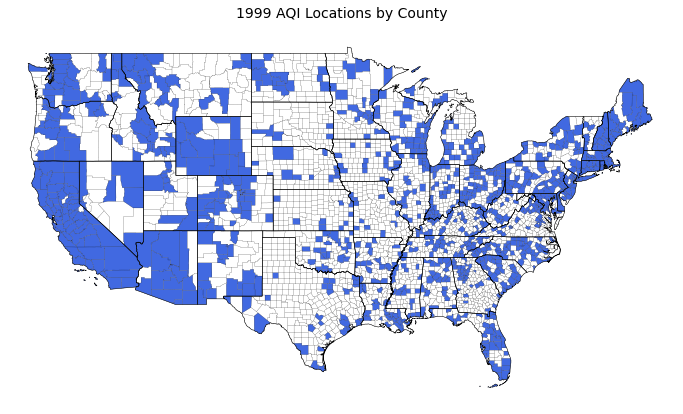

In [47]:
#Code modified from https://jcutrer.com/python/learn-geopandas-plotting-tornados
#and https://jcutrer.com/python/learn-geopandas-plotting-usmaps
#and https://melaniesoek0120.medium.com/data-visualization-how-to-plot-a-map-with-geopandas-in-python-73b10dcd4b4b


#plot 1999 map of AQI counties
fig = plt.figure(1, figsize=(12,9)) 
ax = fig.add_subplot()
ax.set_title('1999 AQI Locations by County', fontsize=14)

# US Lower 48 Bounding Box
# -141.00000, 26.00000, -65.50000, 72.00000

ax.set_xlim(-14100244, -7200000)
ax.set_ylim(2600000, 6550000)
ax.set_axis_off()

ax.set_aspect('equal')

stateMap.boundary.plot(ax=ax, color = 'black', linewidth=0.5)
countyMap.boundary.plot(ax=ax, color = 'black', linewidth=.1)
geo_countyAQI0.plot(ax = ax, color='royalblue')

In [48]:
plt.close()

In [49]:
geo_countyAQI1 = pd.merge(countyMap, AQI1Cleaned, on=['State', 'County'])

In [50]:
len(geo_countyAQI1)

1025

<AxesSubplot:title={'center':'2012 AQI Locations by County'}>

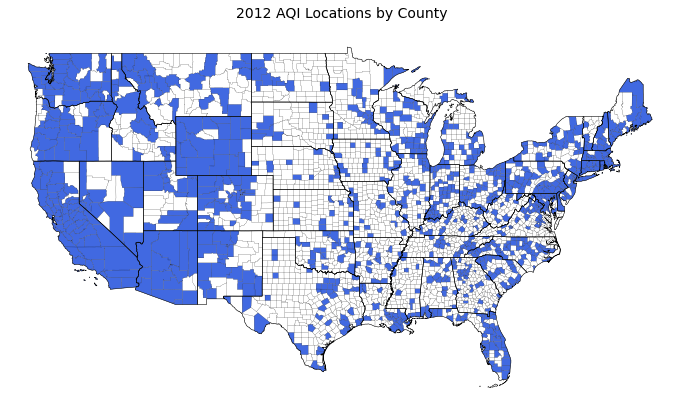

In [51]:
#plot 2012 map of AQI counties
fig = plt.figure(1, figsize=(12,19)) 
ax = fig.add_subplot()
ax.set_title('2012 AQI Locations by County', fontsize=14)

# US Lower 48 Bounding Box
# -141.00000, 26.00000, -65.50000, 72.00000

ax.set_xlim(-14100244, -7200000)
ax.set_ylim(2600000, 6550000)
ax.set_axis_off()

ax.set_aspect('equal')

stateMap.boundary.plot(ax=ax, color = 'black', linewidth=0.5)
countyMap.boundary.plot(ax=ax, color = 'black', linewidth=.1)
geo_countyAQI1.plot(ax = ax, color='royalblue')

In [52]:
fig.savefig('AQI_12_byCounty2.png')

In [53]:
plt.close()

In [54]:
geo_countyAQI2 = pd.merge(countyMap, AQI2Cleaned, on=['State', 'County'])

<AxesSubplot:title={'center':'2020 AQI Locations by County'}>

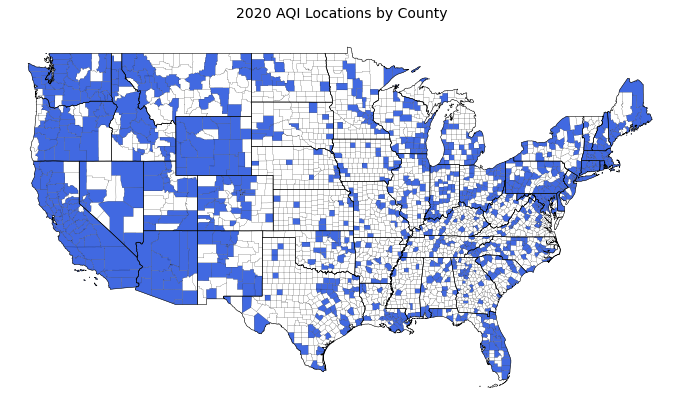

In [55]:
#plot 2020 map of AQI counties
fig = plt.figure(1, figsize=(12,9)) 
ax = fig.add_subplot()
ax.set_title('2020 AQI Locations by County', fontsize=14)

# US Lower 48 Bounding Box
# -141.00000, 26.00000, -65.50000, 72.00000

ax.set_xlim(-14100244, -7200000)
ax.set_ylim(2600000, 6550000)
ax.set_axis_off()

ax.set_aspect('equal')

stateMap.boundary.plot(ax=ax, color = 'black', linewidth=0.5)
countyMap.boundary.plot(ax=ax, color = 'black', linewidth=.1)
geo_countyAQI2.plot(ax = ax, color='royalblue')

In [56]:
plt.close()

## Which states have reports of hazardous AQI?

In [57]:
geo_countyAQI0Hazardous = geo_countyAQI0[geo_countyAQI0['Hazardous Days'] >= 1]
geo_countyAQI0Hazardous.sort_values('Hazardous Days', ascending = False)

STATEFP COUNTYFP  GEOID    County  \
570      06      027  06027      Inyo   
518      56      007  56007    Carbon   
471      08      029  08029     Delta   
631      32      003  32003     Clark   
702      08      085  08085  Montrose   
854      16      077  16077     Power   

                                              geometry       State  Year  \
570  POLYGON Z ((-13222730.716 4470242.267 0.000, -...  California  1999   
518  POLYGON Z ((-12014683.253 5081714.848 0.000, -...     Wyoming  1999   
471  POLYGON Z ((-12064679.174 4669279.159 0.000, -...    Colorado  1999   
631  POLYGON Z ((-12901586.676 4391495.682 0.000, -...      Nevada  1999   
702  POLYGON Z ((-12140499.436 4623697.048 0.000, -...    Colorado  1999   
854  POLYGON Z ((-12606209.869 5299688.377 0.000, -...       Idaho  1999   

     Days with AQI  Good Days  Moderate Days  ...  Hazardous Days  Max AQI  \
570            365        152            155  ...              11     2797   
518             60         50              6  ...               2      540   
471             61         57              3  ...               1      357   
631            365         25            266  ...               1      322   
702            107         86             20  ...               1      390   
854            327         40            172  ...               1      489   

     90th Percentile AQI  Median AQI  Days CO  Days NO2  Days Ozone  Days SO2  \
570                  115          58        0         0         300         0   
518                   64          23        0         0           0         0   
471                   44          23        0         0           0         0   
631                  119          75       15        47         190         0   
702                   55          31        0         0           0         0   
854                  159          82        0         0           0         0   

     Days PM2.5  Days PM10  
570           6         59  
518           0         60  
471           0         61  
631          47         66  
702           0        107  
854         272         55  

[6 rows x 23 columns]

<AxesSubplot:title={'center':'1999 AQI Hazardous Days Locations by County'}>

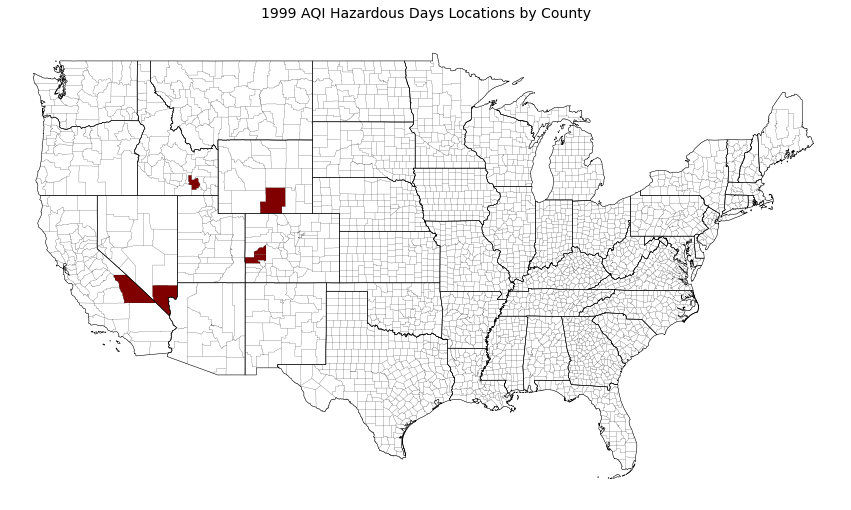

In [58]:
#plot 1999 map of AQI counties with Hazardous Days
fig = plt.figure(1, figsize=(15,12)) 
ax = fig.add_subplot()
ax.set_title('1999 AQI Hazardous Days Locations by County', fontsize=14)

# US Lower 48 Bounding Box
# -141.00000, 26.00000, -65.50000, 72.00000

ax.set_xlim(-14100244, -7200000)
ax.set_ylim(2600000, 6550000)
ax.set_axis_off()

ax.set_aspect('equal')

stateMap.boundary.plot(ax=ax, color = 'black', linewidth=0.5)
countyMap.boundary.plot(ax=ax, color = 'black', linewidth=.1)
geo_countyAQI0Hazardous.plot(ax = ax, color='maroon', legend=True)

In [59]:
plt.close()

In [60]:
geo_countyAQI1Hazardous = geo_countyAQI1[geo_countyAQI1['Hazardous Days'] >= 1]
geo_countyAQI1Hazardous.sort_values('Hazardous Days', ascending = False)

STATEFP COUNTYFP  GEOID     County  \
636      06      051  06051       Mono   
571      06      027  06027       Inyo   
928      32      031  32031     Washoe   
350      04      021  04021      Pinal   
872      41      017  41017  Deschutes   
190      35      029  35029       Luna   
870      48      141  48141    El Paso   
161      53      007  53007     Chelan   
622      15      001  15001     Hawaii   

                                              geometry       State  Year  \
636  POLYGON Z ((-13319286.571 4593829.531 0.000, -...  California  2012   
571  POLYGON Z ((-13222730.716 4470242.267 0.000, -...  California  2012   
928  POLYGON Z ((-13358978.203 4727451.989 0.000, -...      Nevada  2012   
350  POLYGON Z ((-12490462.757 3864339.211 0.000, -...     Arizona  2012   
872  POLYGON Z ((-13581105.004 5377915.646 0.000, -...      Oregon  2012   
190  POLYGON Z ((-12048026.001 3808400.415 0.000, -...  New Mexico  2012   
870  POLYGON Z ((-11871720.418 3727440.508 0.000, -...       Texas  2012   
161  POLYGON Z ((-13489708.473 6058387.711 0.000, -...  Washington  2012   
622  POLYGON Z ((-17372210.805 2228128.372 0.000, -...      Hawaii  2012   

     Days with AQI  Good Days  Moderate Days  ...  Hazardous Days  Max AQI  \
636            366        326             16  ...              14     3868   
571            366        204            133  ...               8     3812   
928            366        144            202  ...               8      895   
350            366         49            234  ...               4      594   
872            366        303             45  ...               4      546   
190            364        224            129  ...               3      994   
870            366        113            229  ...               2      643   
161            366        260             81  ...               1      347   
622            366          0             27  ...               1      322   

     90th Percentile AQI  Median AQI  Days CO  Days NO2  Days Ozone  Days SO2  \
636                   54          17        0         0           0         0   
571                   93          48        0         0         280         0   
928                   88          56        0        21         244         0   
350                  124          75        0         0         111         0   
872                   61          35        0         0         127         0   
190                   77          46        0         3         324         0   
870                   92          58        0        21         154         0   
161                   76          31        0         0           0         0   
622                  200         171        0         0           0       358   

     Days PM2.5  Days PM10  
636          21        345  
571          10         76  
928          79         22  
350           8        247  
872         239          0  
190           0         37  
870         173         18  
161         366          0  
622           8          0  

[9 rows x 23 columns]

<AxesSubplot:title={'center':'2012 AQI Hazardous Days Locations by County'}>

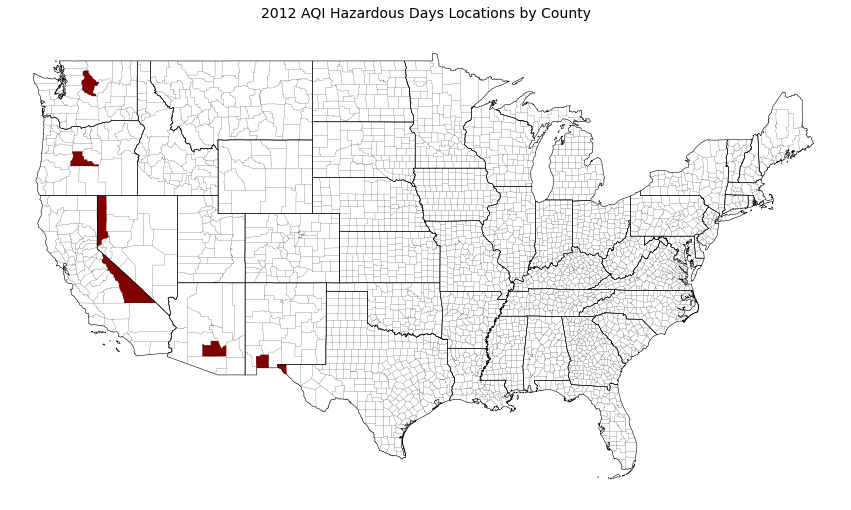

In [61]:
#plot 2012 map of AQI counties with Hazardous Days
fig = plt.figure(1, figsize=(15,12)) 
ax = fig.add_subplot()
ax.set_title('2012 AQI Hazardous Days Locations by County', fontsize=14)

# US Lower 48 Bounding Box
# -141.00000, 26.00000, -65.50000, 72.00000

ax.set_xlim(-14100244, -7200000)
ax.set_ylim(2600000, 6550000)
ax.set_axis_off()

ax.set_aspect('equal')

stateMap.boundary.plot(ax=ax, color = 'black', linewidth=0.5)
countyMap.boundary.plot(ax=ax, color = 'black', linewidth=.1)
geo_countyAQI1Hazardous.plot(ax = ax, color='maroon', legend=True)

In [62]:
plt.close()

In [63]:
geo_countyAQI2Hazardous = geo_countyAQI2[geo_countyAQI2['Hazardous Days'] >= 1]
geo_countyAQI2Hazardous.sort_values('Hazardous Days', ascending = False)

STATEFP COUNTYFP  GEOID       County  \
618      06      051  06051         Mono   
76       41      047  41047       Marion   
886      41      039  41039         Lane   
556      06      027  06027         Inyo   
11       41      033  41033    Josephine   
191      41      043  41043         Linn   
846      41      017  41017    Deschutes   
351      53      071  53071  Walla Walla   
850      41      019  41019      Douglas   
990      53      039  53039    Klickitat   
728      41      051  41051    Multnomah   
658      53      005  53005       Benton   
536      06      043  06043     Mariposa   
991      53      011  53011        Clark   
350      41      031  41031    Jefferson   
249      41      067  41067   Washington   
538      53      065  53065      Stevens   
900      53      063  53063      Spokane   
652      41      059  41059     Umatilla   
644      53      077  53077       Yakima   
640      06      063  06063       Plumas   
655      41      029  41029      Jackson   
411      41      003  41003       Benton   
365      41      013  41013        Crook   
600      53      037  53037     Kittitas   
228      41      065  41065        Wasco   
721      41      005  41005    Clackamas   
343      04      021  04021        Pinal   
104      53      047  53047     Okanogan   
162      53      007  53007       Chelan   
851      41      035  41035      Klamath   
484      06      087  06087   Santa Cruz   
591      06      045  06045    Mendocino   
561      06      065  06065    Riverside   
352      41      025  41025       Harney   
482      06      093  06093     Siskiyou   
294      04      027  04027         Yuma   
966      56      037  56037   Sweetwater   
952      53      045  53045        Mason   
56       16      009  16009      Benewah   
262      41      023  41023        Grant   
188      35      029  35029         Luna   
839      06      007  06007        Butte   
657      53      009  53009      Clallam   
833      16      057  16057        Latah   
816      30      053  30053      Lincoln   
811      32      019  32019         Lyon   
784      06      101  06101       Sutter   
426      16      079  16079     Shoshone   
648      16      069  16069    Nez Perce   
406      16      055  16055     Kootenai   
237      06      031  06031        Kings   

                                              geometry       State  Year  \
618  POLYGON Z ((-13319286.571 4593829.531 0.000, -...  California  2020   
76   POLYGON Z ((-13712435.954 5568973.768 0.000, -...      Oregon  2020   
886  POLYGON Z ((-13820344.504 5422012.049 0.000, -...      Oregon  2020   
556  POLYGON Z ((-13222730.716 4470242.267 0.000, -...  California  2020   
11   POLYGON Z ((-13808175.280 5190468.447 0.000, -...      Oregon  2020   
191  POLYGON Z ((-13720261.826 5524801.970 0.000, -...      Oregon  2020   
846  POLYGON Z ((-13581105.004 5377915.646 0.000, -...      Oregon  2020   
351  POLYGON Z ((-13249626.173 5784274.732 0.000, -...  Washington  2020   
850  POLYGON Z ((-13826217.832 5384667.258 0.000, -...      Oregon  2020   
990  POLYGON Z ((-13537841.797 5756604.958 0.000, -...  Washington  2020   
728  POLYGON Z ((-13684389.342 5705226.848 0.000, -...      Oregon  2020   
658  POLYGON Z ((-13344318.985 5850584.660 0.000, -...  Washington  2020   
536  POLYGON Z ((-13402149.015 4507559.903 0.000, -...  California  2020   
991  POLYGON Z ((-13669584.073 5721694.757 0.000, -...  Washington  2020   
350  POLYGON Z ((-13564143.253 5510907.361 0.000, -...      Oregon  2020   
249  POLYGON Z ((-13746356.784 5661849.706 0.000, -...      Oregon  2020   
538  POLYGON Z ((-13180495.656 6079362.468 0.000, -...  Washington  2020   
900  POLYGON Z ((-13115861.222 6008747.749 0.000, -...  Washington  2020   
652  POLYGON Z ((-13295097.136 5736553.340 0.000, -...      Oregon  2020   
644  POLYGON Z ((-13527940.373 5811831.033 0.000, -...  Washington  2020   
640  POLYGON Z ((-13525054.861 4903182.075 0.000, -...  California  2020   

<AxesSubplot:title={'center':'2020 AQI Hazardous Days Locations by County'}>

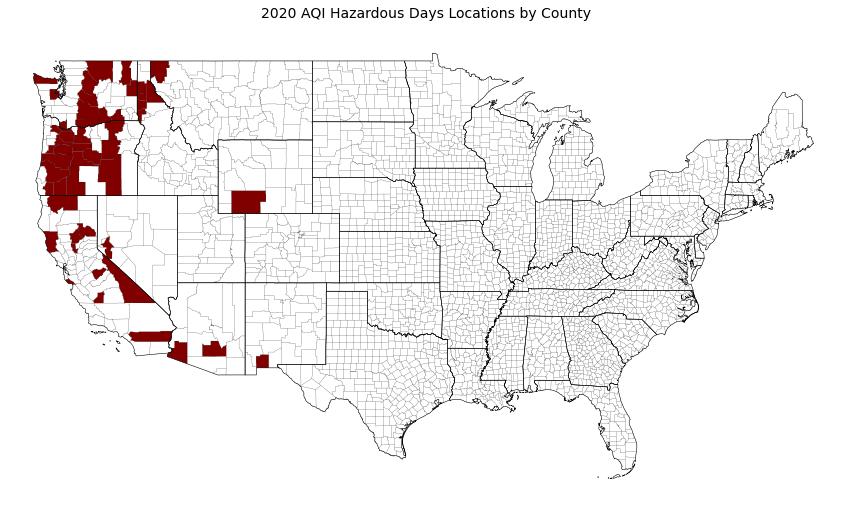

In [64]:
#plot 2020 map of AQI counties with Hazardous Days
fig = plt.figure(1, figsize=(15,12)) 
ax = fig.add_subplot()
ax.set_title('2020 AQI Hazardous Days Locations by County', fontsize=14)

# US Lower 48 Bounding Box
# -141.00000, 26.00000, -65.50000, 72.00000

ax.set_xlim(-14100244, -7200000)
ax.set_ylim(2600000, 6550000)
ax.set_axis_off()

ax.set_aspect('equal')

stateMap.boundary.plot(ax=ax, color = 'black', linewidth=0.5)
countyMap.boundary.plot(ax=ax, color = 'black', linewidth=.1)
geo_countyAQI2Hazardous.plot(ax = ax, color='maroon', legend=True)

In [65]:
plt.close()

### Which states have reports of very unhealthy AQI?

In [66]:
geo_countyAQI0VeryUnhealthy = geo_countyAQI0[geo_countyAQI0['Very Unhealthy Days'] >= 1]
geo_countyAQI0VeryUnhealthy.sort_values('Very Unhealthy Days', ascending = False)

STATEFP COUNTYFP  GEOID          County  \
88       06      071  06071  San Bernardino   
264      48      201  48201          Harris   
65       13      247  13247        Rockdale   
451      13      121  13121          Fulton   
772      06      029  06029            Kern   
..      ...      ...    ...             ...   
71       39      083  39083            Knox   
74       42      021  42021         Cambria   
664      39      167  39167      Washington   
663      51      085  51085         Hanover   
67       42      079  42079         Luzerne   

                                              geometry         State  Year  \
88   POLYGON Z ((-13111773.125 4005551.882 0.000, -...    California  1999   
264  POLYGON Z ((-10680493.441 3501153.240 0.000, -...         Texas  1999   
65   POLYGON Z ((-9370109.525 3957024.175 0.000, -9...       Georgia  1999   
451  POLYGON Z ((-9441659.348 3940968.600 0.000, -9...       Georgia  1999   
772  POLYGON Z ((-13379951.129 4246665.911 0.000, -...    California  1999   
..                                                 ...           ...   ...   
71   POLYGON Z ((-9211123.585 4889205.950 0.000, -9...          Ohio  1999   
74   POLYGON Z ((-8800337.966 4880477.926 0.000, -8...  Pennsylvania  1999   
664  POLYGON Z ((-9110928.473 4759212.967 0.000, -9...          Ohio  1999   
663  POLYGON Z ((-8660170.140 4515703.396 0.000, -8...      Virginia  1999   
67   POLYGON Z ((-8494805.148 5029990.475 0.000, -8...  Pennsylvania  1999   

     Days with AQI  Good Days  Moderate Days  ...  Hazardous Days  Max AQI  \
88             365         16            163  ...               0      239   
264            365        120            148  ...               0      271   
65             363        240             47  ...               0      225   
451            365         72            193  ...               0      236   
772            365         62            107  ...               0      207   
..             ...        ...            ...  ...             ...      ...   
71             214        124             60  ...               0      202   
74             365        190            131  ...               0      203   
664            281        179             59  ...               0      214   
663            213        107             52  ...               0      204   
67             365        216            122  ...               0      201   

     90th Percentile AQI  Median AQI  Days CO  Days NO2  Days Ozone  Days SO2  \
88                   190         101        0        93         206         0   
264                  185          63        1        78         190        55   
65                   156          34        0       154         209         0   
451                  164          71        2        41         114        31   
772                  179         108        0        40         240         0   
..                   ...         ...      ...       ...         ...       ...   
71                   119          47        0         0         214         0   
74                   105          49        2        78         152        97   
664                  115          45        0         0         199         0   
663                  140          50        0         0         213         0   
67                    90          45        1        61         154        33   

     Days PM2.5  Days PM10  
88           61          5  
264          30         11  
65            0          0  
451         172          5  
772          81          4  
..          ...        ...  
71            0          0  
74           36          0  
664           0         82  
663           0          0  
67          116          0  

[196 rows x 23 columns]

<AxesSubplot:title={'center':'1999 AQI Very Unhealthy Days Locations by County'}>

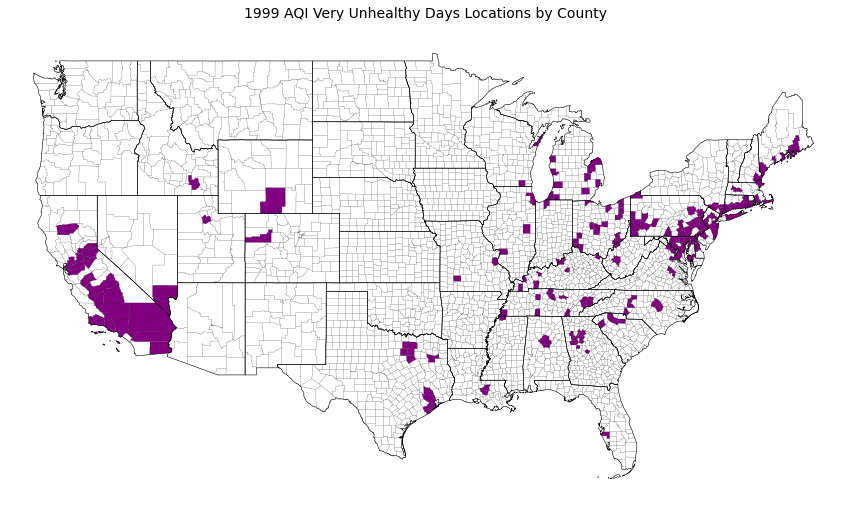

In [67]:
#plot 1999 map of AQI counties with Very Unhealthy Days
fig = plt.figure(1, figsize=(15,12)) 
ax = fig.add_subplot()
ax.set_title('1999 AQI Very Unhealthy Days Locations by County', fontsize=14)

# US Lower 48 Bounding Box
# -141.00000, 26.00000, -65.50000, 72.00000

ax.set_xlim(-14100244, -7200000)
ax.set_ylim(2600000, 6550000)
ax.set_axis_off()

ax.set_aspect('equal')

stateMap.boundary.plot(ax=ax, color = 'black', linewidth=0.5)
countyMap.boundary.plot(ax=ax, color = 'black', linewidth=.1)
geo_countyAQI0VeryUnhealthy.plot(ax = ax, color='purple')

In [68]:
fig.savefig('AQI_99VUnhealthy_County')

In [69]:
plt.close()

In [70]:
geo_countyAQI1VeryUnhealthy = geo_countyAQI1[geo_countyAQI1['Very Unhealthy Days'] >= 1]
geo_countyAQI1VeryUnhealthy.sort_values('Very Unhealthy Days', ascending = False)

STATEFP COUNTYFP  GEOID          County  \
66       16      059  16059           Lemhi   
101      06      071  06071  San Bernardino   
138      30      081  30081         Ravalli   
350      04      021  04021           Pinal   
622      15      001  15001          Hawaii   
..      ...      ...    ...             ...   
446      24      019  24019      Dorchester   
447      48      039  48039        Brazoria   
10       06      105  06105         Trinity   
509      47      089  47089       Jefferson   
995      56      037  56037      Sweetwater   

                                              geometry       State  Year  \
66   POLYGON Z ((-12779232.863 5559063.277 0.000, -...       Idaho  2012   
101  POLYGON Z ((-13111773.125 4005551.882 0.000, -...  California  2012   
138  POLYGON Z ((-12753040.166 5714517.105 0.000, -...     Montana  2012   
350  POLYGON Z ((-12490462.757 3864339.211 0.000, -...     Arizona  2012   
622  POLYGON Z ((-17372210.805 2228128.372 0.000, -...      Hawaii  2012   
..                                                 ...         ...   ...   
446  MULTIPOLYGON Z (((-8470917.655 4570733.425 0.0...    Maryland  2012   
447  POLYGON Z ((-10672647.977 3384053.669 0.000, -...       Texas  2012   
10   POLYGON Z ((-13761723.104 4973996.536 0.000, -...  California  2012   
509  POLYGON Z ((-9318471.085 4288285.077 0.000, -9...   Tennessee  2012   
995  POLYGON Z ((-12251122.734 5172873.270 0.000, -...     Wyoming  2012   

     Days with AQI  Good Days  Moderate Days  ...  Hazardous Days  Max AQI  \
66             362        198            118  ...               0      264   
101            366         50            173  ...               0      207   
138            354        257             56  ...               0      286   
350            366         49            234  ...               4      594   
622            366          0             27  ...               1      322   
..             ...        ...            ...  ...             ...      ...   
446            365        281             66  ...               0      208   
447            366        283             62  ...               0      233   
10             343        178            130  ...               0      219   
509            245        152             84  ...               0      206   
995            366        213            145  ...               0      284   

     90th Percentile AQI  Median AQI  Days CO  Days NO2  Days Ozone  Days SO2  \
66                   110          44        0         0           0         0   
101                  169          90        0        17         227         0   
138                  118          27        0         0           0         0   
350                  124          75        0         0         111         0   
622                  200         171        0         0           0       358   
..                   ...         ...      ...       ...         ...       ...   
446                   71          39        5         0         310         0   
447                   84          34        0         3         363         0   
10                   101          45        0         0           0         0   
509                   80          46        0         0         245         0   
995                   77          47        0         2         296         9   

     Days PM2.5  Days PM10  
66          362          0  
101         113          9  
138         354          0  
350           8        247  
622           8          0  
..          ...        ...  
446          50          0  
447           0          0  
10          342          1  
509           0          0  
995          12         47  

[64 rows x 23 columns]

<AxesSubplot:title={'center':'2012 AQI Very Unhealthy Days Locations by County'}>

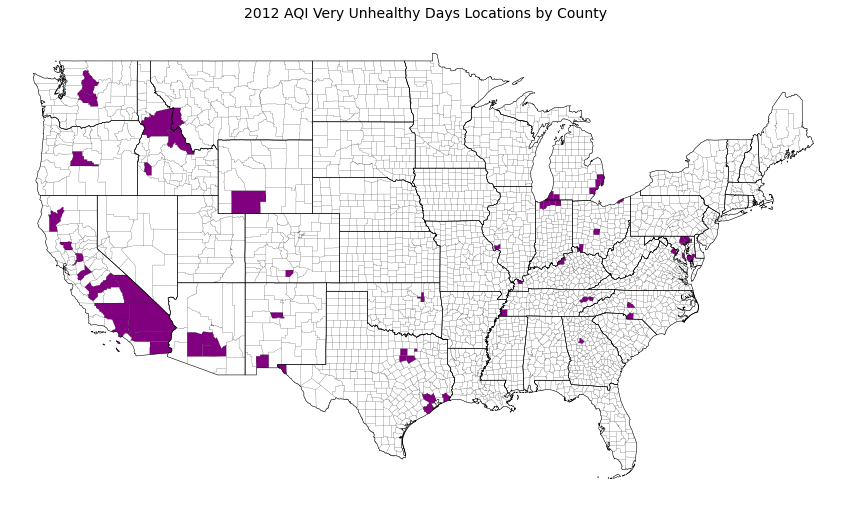

In [71]:
#plot 2012 map of AQI counties with Very Unhealthy Days
fig = plt.figure(1, figsize=(15,12)) 
ax = fig.add_subplot()
ax.set_title('2012 AQI Very Unhealthy Days Locations by County', fontsize=14)

# US Lower 48 Bounding Box
# -141.00000, 26.00000, -65.50000, 72.00000

ax.set_xlim(-14100244, -7200000)
ax.set_ylim(2600000, 6550000)
ax.set_axis_off()

ax.set_aspect('equal')

stateMap.boundary.plot(ax=ax, color = 'black', linewidth=0.5)
countyMap.boundary.plot(ax=ax, color = 'black', linewidth=.1)
geo_countyAQI1VeryUnhealthy.plot(ax = ax, color='purple')

In [72]:
plt.close()

In [73]:
geo_countyAQI2VeryUnhealthy = geo_countyAQI2[geo_countyAQI2['Very Unhealthy Days'] >= 1]
geo_countyAQI2VeryUnhealthy.sort_values('Very Unhealthy Days', ascending = False)

STATEFP COUNTYFP  GEOID          County  \
399      04      013  04013        Maricopa   
101      06      071  06071  San Bernardino   
291      06      037  06037     Los Angeles   
618      06      051  06051            Mono   
640      06      063  06063          Plumas   
..      ...      ...    ...             ...   
667      04      019  04019            Pima   
591      06      045  06045       Mendocino   
658      53      005  53005          Benton   
604      15      001  15001          Hawaii   
31       30      089  30089         Sanders   

                                              geometry       State  Year  \
399  POLYGON Z ((-12616208.697 3947089.125 0.000, -...     Arizona  2020   
101  POLYGON Z ((-13111773.125 4005551.882 0.000, -...  California  2020   
291  MULTIPOLYGON Z (((-13202867.311 3935367.958 0....  California  2020   
618  POLYGON Z ((-13319286.571 4593829.531 0.000, -...  California  2020   
640  POLYGON Z ((-13525054.861 4903182.075 0.000, -...  California  2020   
..                                                 ...         ...   ...   
667  POLYGON Z ((-12616271.704 3806816.275 0.000, -...     Arizona  2020   
591  POLYGON Z ((-13806281.641 4838657.313 0.000, -...  California  2020   
658  POLYGON Z ((-13344318.985 5850584.660 0.000, -...  Washington  2020   
604  POLYGON Z ((-17372210.805 2228128.372 0.000, -...      Hawaii  2020   
31   POLYGON Z ((-12918600.640 6110836.692 0.000, -...     Montana  2020   

     Days with AQI  Good Days  Moderate Days  ...  Hazardous Days  Max AQI  \
399            366         14            151  ...               0      282   
101            366         50            153  ...               0      236   
291            366         60            170  ...               0      235   
618            366        211             90  ...              26     1928   
640            360        183            127  ...               4      469   
..             ...        ...            ...  ...             ...      ...   
667            366        154            199  ...               0      277   
591            366        280             63  ...               2      456   
658            365        317             36  ...               5      908   
604            366        352              3  ...               0      231   
31             366        328             30  ...               0      227   

     90th Percentile AQI  Median AQI  Days CO  Days NO2  Days Ozone  Days SO2  \
399                  215         112        0         0         273         0   
101                  185          93        0        17         228         0   
291                  164          83        0        23         209         0   
618                  199          40        0         0           0         0   
640                  146          49        0         0           0         0   
..                   ...         ...      ...       ...         ...       ...   
667                   77          53        0         0         202         0   
591                   76          34        0         0         179         0   
658                   54          33        0         0         114         0   
604                   30          18        0         0           0        22   
31                    51          23        0         0           0         0   

     Days PM2.5  Days PM10  
399          55         38  
101         106         15  
291         129          5  
618         304         62  
640         360          0  
..          ...        ...  
667          45        119  
591         182          5  
658         179         72  
604         344          0  
31          346         20  

[82 rows x 23 columns]

<AxesSubplot:title={'center':'2020 AQI Very Unhealthy Days Locations by County'}>

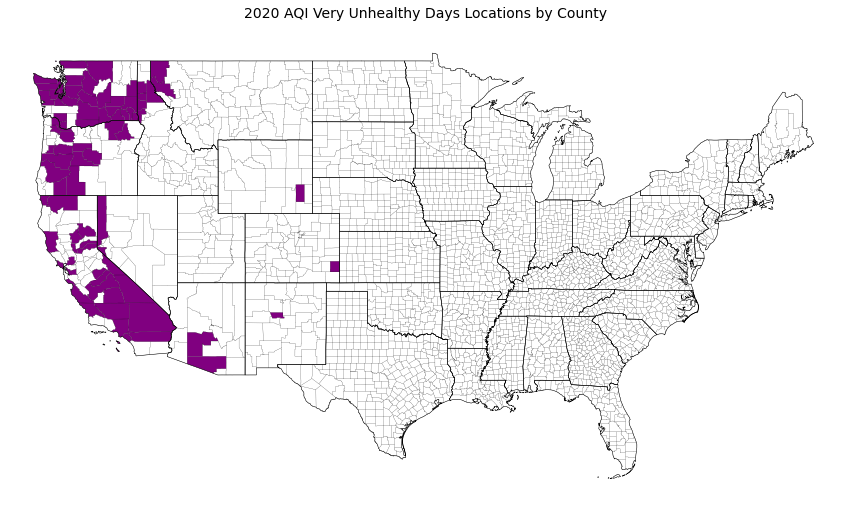

In [74]:
#plot 2020 map of AQI counties with Very Unhealthy Days
fig = plt.figure(1, figsize=(15,12)) 
ax = fig.add_subplot()
ax.set_title('2020 AQI Very Unhealthy Days Locations by County', fontsize=14)

# US Lower 48 Bounding Box
# -141.00000, 26.00000, -65.50000, 72.00000

ax.set_xlim(-14100244, -7200000)
ax.set_ylim(2600000, 6550000)
ax.set_axis_off()

ax.set_aspect('equal')

stateMap.boundary.plot(ax=ax, color = 'black', linewidth=0.5)
countyMap.boundary.plot(ax=ax, color = 'black', linewidth=.1)
geo_countyAQI2VeryUnhealthy.plot(ax = ax, color='purple')

In [75]:
fig.savefig('AQI_20VUnhealthy_County')

In [76]:
plt.close()

### Which states have reports of unhealthy AQI?

In [77]:
geo_countyAQI0Unhealthy = geo_countyAQI0[geo_countyAQI0['Unhealthy Days'] >= 1]
geo_countyAQI0Unhealthy.sort_values('Unhealthy Days', ascending = False)

STATEFP COUNTYFP  GEOID          County  \
772       06      029  06029            Kern   
190       06      019  06019          Fresno   
651       06      107  06107          Tulare   
88        06      071  06071  San Bernardino   
577       06      065  06065       Riverside   
...      ...      ...    ...             ...   
582       20      125  20125      Montgomery   
580       37      129  37129     New Hanover   
562       06      021  06021           Glenn   
553       33      005  33005        Cheshire   
1024      26      091  26091         Lenawee   

                                               geometry           State  Year  \
772   POLYGON Z ((-13379951.129 4246665.911 0.000, -...      California  1999   
190   POLYGON Z ((-13431358.915 4406845.465 0.000, -...      California  1999   
651   POLYGON Z ((-13307810.644 4345462.231 0.000, -...      California  1999   
88    POLYGON Z ((-13111773.125 4005551.882 0.000, -...      California  1999   
577   POLYGON Z ((-13099664.236 3990058.313 0.000, -...      California  1999   
...                                                 ...             ...   ...   
582   POLYGON Z ((-10682701.129 4465583.034 0.000, -...          Kansas  1999   
580   POLYGON Z ((-8686251.184 4049339.918 0.000, -8...  North Carolina  1999   
562   POLYGON Z ((-13685357.043 4809298.899 0.000, -...      California  1999   
553   POLYGON Z ((-8076700.161 5261618.993 0.000, -8...   New Hampshire  1999   
1024  POLYGON Z ((-9391279.264 5143349.461 0.000, -9...        Michigan  1999   

      Days with AQI  Good Days  Moderate Days  ...  Hazardous Days  Max AQI  \
772             365         62            107  ...               0      207   
190             365         59            106  ...               0      219   
651             365        105             88  ...               0      207   
88              365         16            163  ...               0      239   
577             365         54            142  ...               0      219   
...             ...        ...            ...  ...             ...      ...   
582             361        289             59  ...               0      189   
580             364        236            114  ...               0      200   
562             365        241             99  ...               0      169   
553             336        276             50  ...               0      159   
1024            183        116             49  ...               0      151   

      90th Percentile AQI  Median AQI  Days CO  Days NO2  Days Ozone  \
772                   179         108        0        40         240   
190                   182         108        7        38         231   
651                   181          97        1        55         248   
88                    190         101        0        93         206   
577                   166          95        1        67         201   
...                   ...         ...      ...       ...         ...   
582                    64          30        0         0           0   
580                    79          41       59         0         124   
562                    93          44        0         0         340   
553                    61          34        0         0         164   
1024                   97          44        0         0         183   

      Days SO2  Days PM2.5  Days PM10  
772          0          81          4  
190          0          89          0  
651          0          61          0  
88           0          61          5  
577          0          90          6  
...        ...         ...        ...  
582        198           0        163  
580        110          70          1  
562          0           0         25  
553        133          36          3  
1024         0           0          0  

[608 rows x 23 columns]

<AxesSubplot:title={'center':'1999 AQI Unhealthy Days Locations by County'}>

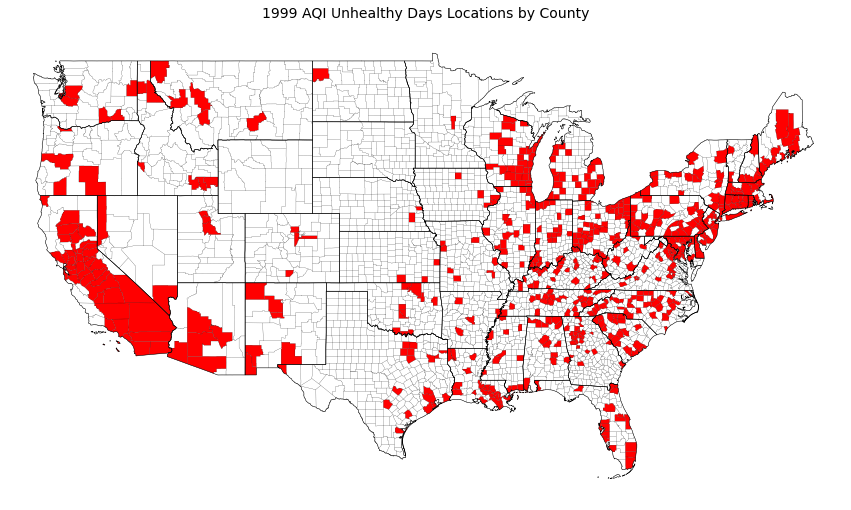

In [78]:
#plot 1999 map of AQI counties with Unhealthy Days
fig = plt.figure(1, figsize=(15,12)) 
ax = fig.add_subplot()
ax.set_title('1999 AQI Unhealthy Days Locations by County', fontsize=14)

# US Lower 48 Bounding Box
# -141.00000, 26.00000, -65.50000, 72.00000

ax.set_xlim(-14100244, -7200000)
ax.set_ylim(2600000, 6550000)
ax.set_axis_off()

ax.set_aspect('equal')

stateMap.boundary.plot(ax=ax, color = 'black', linewidth=0.5)
countyMap.boundary.plot(ax=ax, color = 'black', linewidth=.1)
geo_countyAQI0Unhealthy.plot(ax = ax, color='red')

In [79]:
plt.close()

In [80]:
geo_countyAQI1Unhealthy = geo_countyAQI1[geo_countyAQI1['Unhealthy Days'] >= 1]
geo_countyAQI1Unhealthy.sort_values('Unhealthy Days', ascending = False)

STATEFP COUNTYFP  GEOID          County  \
622      15      001  15001          Hawaii   
578      06      065  06065       Riverside   
101      06      071  06071  San Bernardino   
776      06      029  06029            Kern   
200      06      019  06019          Fresno   
..      ...      ...    ...             ...   
710      12      023  12023        Columbia   
126      55      127  55127        Walworth   
712      24      023  24023         Garrett   
431      06      013  06013    Contra Costa   
275      25      005  25005         Bristol   

                                              geometry          State  Year  \
622  POLYGON Z ((-17372210.805 2228128.372 0.000, -...         Hawaii  2012   
578  POLYGON Z ((-13099664.236 3990058.313 0.000, -...     California  2012   
101  POLYGON Z ((-13111773.125 4005551.882 0.000, -...     California  2012   
776  POLYGON Z ((-13379951.129 4246665.911 0.000, -...     California  2012   
200  POLYGON Z ((-13431358.915 4406845.465 0.000, -...     California  2012   
..                                                 ...            ...   ...   
710  POLYGON Z ((-9217306.937 3473511.388 0.000, -9...        Florida  2012   
126  POLYGON Z ((-9882618.894 5258994.927 0.000, -9...      Wisconsin  2012   
712  POLYGON Z ((-8848431.437 4737146.913 0.000, -8...       Maryland  2012   
431  POLYGON Z ((-13628818.541 4548250.643 0.000, -...     California  2012   
275  MULTIPOLYGON Z (((-7884987.070 5073837.020 0.0...  Massachusetts  2012   

     Days with AQI  Good Days  Moderate Days  ...  Hazardous Days  Max AQI  \
622            366          0             27  ...               1      322   
578            366         21            178  ...               0      233   
101            366         50            173  ...               0      207   
776            366         64            160  ...               0      202   
200            366         77            155  ...               0      212   
..             ...        ...            ...  ...             ...      ...   
710            365        316             47  ...               0      153   
126            191        127             49  ...               0      174   
712            357        248             96  ...               0      154   
431            366        292             70  ...               0      154   
275            366        281             76  ...               0      161   

     90th Percentile AQI  Median AQI  Days CO  Days NO2  Days Ozone  Days SO2  \
622                  200         171        0         0           0       358   
578                  156          94        0         1         185         0   
101                  169          90        0        17         227         0   
776                  154          84        0         0         218         0   
200                  151          80        0         1         222         0   
..                   ...         ...      ...       ...         ...       ...   
710                   54          36        0         0         271         0   
126                   90          44        0         0         191         0   
712                   77          43        1         0         297         0   
431                   65          39        0        17         293         0   
275                   61          40        0         0         174        34   

     Days PM2.5  Days PM10  
622           8          0  
578         136         44  
101         113          9  
776         143          5  
200         143          0  
..          ...        ...  
710          94          0  
126           0          0  
712          59          0  
431          56          0  
275         158          0  

[376 rows x 23 columns]

<AxesSubplot:title={'center':'2012 AQI Unhealthy Days Locations by County'}>

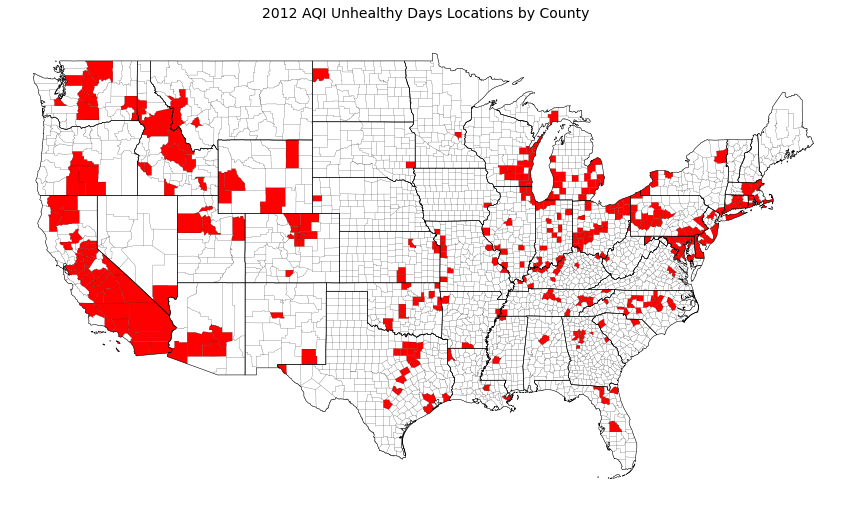

In [81]:
#plot 2012 map of AQI counties with Unhealthy Days
fig = plt.figure(1, figsize=(15,12)) 
ax = fig.add_subplot()
ax.set_title('2012 AQI Unhealthy Days Locations by County', fontsize=14)

# US Lower 48 Bounding Box
# -141.00000, 26.00000, -65.50000, 72.00000

ax.set_xlim(-14100244, -7200000)
ax.set_ylim(2600000, 6550000)
ax.set_axis_off()

ax.set_aspect('equal')

stateMap.boundary.plot(ax=ax, color = 'black', linewidth=0.5)
countyMap.boundary.plot(ax=ax, color = 'black', linewidth=.1)
geo_countyAQI1Unhealthy.plot(ax = ax, color='red')

In [82]:
plt.close()

In [83]:
geo_countyAQI2Unhealthy = geo_countyAQI2[geo_countyAQI2['Unhealthy Days'] >= 1]
geo_countyAQI2Unhealthy.sort_values('Unhealthy Days', ascending = False)

STATEFP COUNTYFP  GEOID          County  \
574      29      143  29143      New Madrid   
101      06      071  06071  San Bernardino   
399      04      013  04013        Maricopa   
291      06      037  06037     Los Angeles   
561      06      065  06065       Riverside   
..      ...      ...    ...             ...   
431      47      065  47065        Hamilton   
418      29      095  29095         Jackson   
396      18      091  18091         LaPorte   
382      56      035  56035        Sublette   
991      53      011  53011           Clark   

                                              geometry       State  Year  \
574  POLYGON Z ((-10015690.436 4329011.303 0.000, -...    Missouri  2020   
101  POLYGON Z ((-13111773.125 4005551.882 0.000, -...  California  2020   
399  POLYGON Z ((-12616208.697 3947089.125 0.000, -...     Arizona  2020   
291  MULTIPOLYGON Z (((-13202867.311 3935367.958 0....  California  2020   
561  POLYGON Z ((-13099664.236 3990058.313 0.000, -...  California  2020   
..                                                 ...         ...   ...   
431  POLYGON Z ((-9514933.880 4137081.705 0.000, -9...   Tennessee  2020   
418  POLYGON Z ((-10531751.566 4692182.038 0.000, -...    Missouri  2020   
396  POLYGON Z ((-9677309.109 5089354.435 0.000, -9...     Indiana  2020   
382  POLYGON Z ((-12314544.343 5249395.659 0.000, -...     Wyoming  2020   
991  POLYGON Z ((-13669584.073 5721694.757 0.000, -...  Washington  2020   

     Days with AQI  Good Days  Moderate Days  ...  Hazardous Days  Max AQI  \
574            366         59             74  ...               0      200   
101            366         50            153  ...               0      236   
399            366         14            151  ...               0      282   
291            366         60            170  ...               0      235   
561            366         53            168  ...               2      576   
..             ...        ...            ...  ...             ...      ...   
431            365        291             73  ...               0      151   
418            366        253            110  ...               0      157   
396            366        310             49  ...               0      154   
382            366        297             64  ...               0      151   
991            366        312             45  ...               5      509   

     90th Percentile AQI  Median AQI  Days CO  Days NO2  Days Ozone  Days SO2  \
574                  168         117        0         0           0       366   
101                  185          93        0        17         228         0   
399                  215         112        0         0         273         0   
291                  164          83        0        23         209         0   
561                  159          87        0         0         224         0   
..                   ...         ...      ...       ...         ...       ...   
431                   55          40        0         0         163         0   
418                   60          40        0        24           0         0   
396                   61          37        0         0         324         0   
382                   61          44        0         0         355         0   
991                   58          27        0         0          66         0   

     Days PM2.5  Days PM10  
574           0          0  
101         106         15  
399          55         38  
291         129          5  
561         103         39  
..          ...        ...  
431         202          0  
418         271         71  
396          42          0  
382          11          0  
991         300          0  

[221 rows x 23 columns]

<AxesSubplot:title={'center':'2020 AQI Unhealthy Days Locations by County'}>

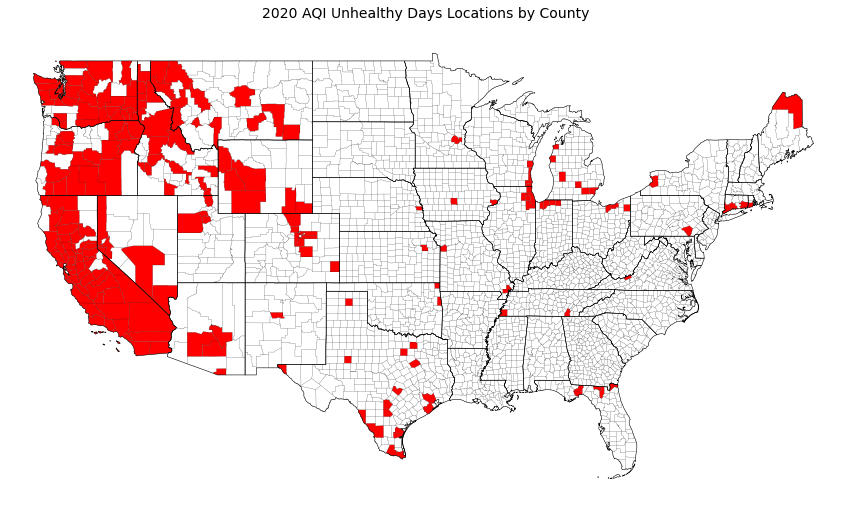

In [84]:
#plot 2020 map of AQI counties with Unhealthy Days
fig = plt.figure(1, figsize=(15,12)) 
ax = fig.add_subplot()
ax.set_title('2020 AQI Unhealthy Days Locations by County', fontsize=14)

# US Lower 48 Bounding Box
# -141.00000, 26.00000, -65.50000, 72.00000

ax.set_xlim(-14100244, -7200000)
ax.set_ylim(2600000, 6550000)
ax.set_axis_off()

ax.set_aspect('equal')

stateMap.boundary.plot(ax=ax, color = 'black', linewidth=0.5)
countyMap.boundary.plot(ax=ax, color = 'black', linewidth=.1)
geo_countyAQI2Unhealthy.plot(ax = ax, color='red')

In [85]:
plt.close()

### Which states have reports of unhealthy for sensitive individuals AQI?

In [86]:
geo_countyAQI0UnhealthySGroups = geo_countyAQI0[geo_countyAQI0['Unhealthy for Sensitive Groups Days'] >= 1]
geo_countyAQI0UnhealthySGroups.sort_values('Unhealthy for Sensitive Groups Days', ascending = False)

STATEFP COUNTYFP  GEOID       County  \
390      04      013  04013     Maricopa   
271      54      029  54029      Hancock   
283      06      037  06037  Los Angeles   
681      47      163  47163     Sullivan   
122      42      007  42007       Beaver   
..      ...      ...    ...          ...   
938      29      097  29097       Jasper   
301      37      155  37155      Robeson   
324      05      001  05001     Arkansas   
462      30      093  30093   Silver Bow   
853      19      153  19153         Polk   

                                              geometry           State  Year  \
390  POLYGON Z ((-12616208.697 3947089.125 0.000, -...         Arizona  1999   
271  POLYGON Z ((-8979915.897 4923150.683 0.000, -8...   West Virginia  1999   
283  MULTIPOLYGON Z (((-13202867.311 3935367.958 0....      California  1999   
681  POLYGON Z ((-9206375.586 4338088.805 0.000, -9...       Tennessee  1999   
122  POLYGON Z ((-8963343.653 4928100.000 0.000, -8...    Pennsylvania  1999   
..                                                 ...             ...   ...   
938  POLYGON Z ((-10532883.796 4438566.815 0.000, -...        Missouri  1999   
301  POLYGON Z ((-8845641.978 4089489.298 0.000, -8...  North Carolina  1999   
324  POLYGON Z ((-10209078.107 4046119.343 0.000, -...        Arkansas  1999   
462  POLYGON Z ((-12587299.359 5728189.399 0.000, -...         Montana  1999   
853  POLYGON Z ((-10443496.694 5112019.210 0.000, -...            Iowa  1999   

     Days with AQI  Good Days  Moderate Days  ...  Hazardous Days  Max AQI  \
390            365          5            168  ...               0      185   
271            365         29            151  ...               0      200   
283            365         17            180  ...               0      203   
681            365         80            149  ...               0      200   
122            365         87            128  ...               0      216   
..             ...        ...            ...  ...             ...      ...   
938            121         59             61  ...               0      106   
301             91         36             54  ...               0      114   
324             28          8             19  ...               0      104   
462            365        349             15  ...               0      107   
853            365        305             59  ...               0      103   

     90th Percentile AQI  Median AQI  Days CO  Days NO2  Days Ozone  Days SO2  \
390                  140         101        3       125         218         0   
271                  137         101        0         0          43       302   
283                  140          97       14       168          85         3   
681                  133          87        3        10         118       211   
122                  144          89        0        24          91       250   
..                   ...         ...      ...       ...         ...       ...   
938                   72          52        0         0           0         0   
301                   80          57        0         0           0         0   
324                   80          66        0         0           0         0   
462                   42          25      186         0           0         0   
853                   57          32       99         0         147         0   

     Days PM2.5  Days PM10  
390           7         12  
271          19          1  
283          91          4  
681          23          0  
122           0          0  
..          ...        ...  
938          85         36  
301          91          0  
324          28          0  
462          54        125  
853          71         48  

[799 rows x 23 columns]

<AxesSubplot:title={'center':'1999 AQI Unhealthy for Sensitive Groups Days Locations by County'}>

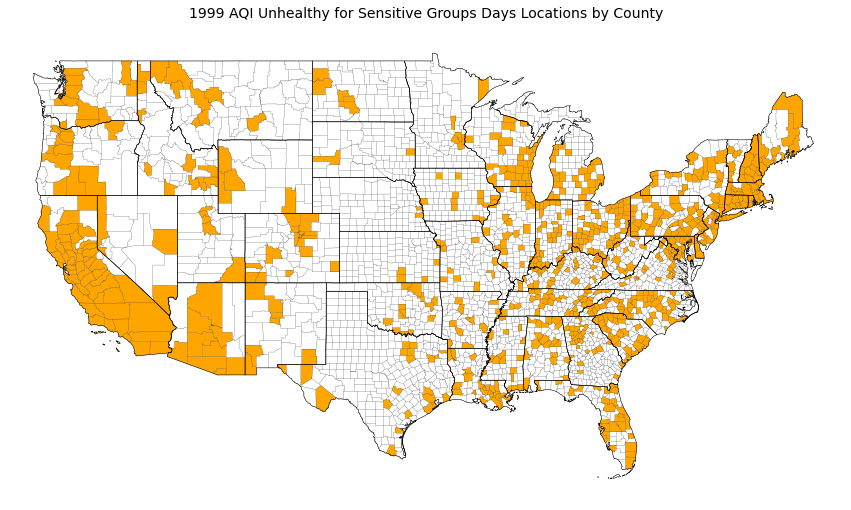

In [87]:
#plot 1999 map of AQI counties with Unhealthy for Sensitive Groups Days
fig = plt.figure(1, figsize=(15,12)) 
ax = fig.add_subplot()
ax.set_title('1999 AQI Unhealthy for Sensitive Groups Days Locations by County', fontsize=14)

# US Lower 48 Bounding Box
# -141.00000, 26.00000, -65.50000, 72.00000

ax.set_xlim(-14100244, -7200000)
ax.set_ylim(2600000, 6550000)
ax.set_axis_off()

ax.set_aspect('equal')

stateMap.boundary.plot(ax=ax, color = 'black', linewidth=0.5)
countyMap.boundary.plot(ax=ax, color = 'black', linewidth=.1)
geo_countyAQI0UnhealthySGroups.plot(ax = ax, color='orange')

In [88]:
plt.close()

In [89]:
geo_countyAQI1UnhealthySGroups = geo_countyAQI1[geo_countyAQI1['Unhealthy for Sensitive Groups Days'] >= 1]
geo_countyAQI1UnhealthySGroups.sort_values('Unhealthy for Sensitive Groups Days', ascending = False)

STATEFP COUNTYFP  GEOID        County  \
166      04      007  04007          Gila   
622      15      001  15001        Hawaii   
578      06      065  06065     Riverside   
652      06      107  06107        Tulare   
296      06      037  06037   Los Angeles   
..      ...      ...    ...           ...   
539      27      075  27075          Lake   
922      53      061  53061     Snohomish   
342      53      021  53021      Franklin   
198      31      157  31157  Scotts Bluff   
945      12      113  12113    Santa Rosa   

                                              geometry       State  Year  \
166  POLYGON Z ((-12436694.552 4026542.710 0.000, -...     Arizona  2012   
622  POLYGON Z ((-17372210.805 2228128.372 0.000, -...      Hawaii  2012   
578  POLYGON Z ((-13099664.236 3990058.313 0.000, -...  California  2012   
652  POLYGON Z ((-13307810.644 4345462.231 0.000, -...  California  2012   
296  MULTIPOLYGON Z (((-13202867.311 3935367.958 0....  California  2012   
..                                                 ...         ...   ...   
539  POLYGON Z ((-10218917.636 6108791.206 0.000, -...   Minnesota  2012   
922  MULTIPOLYGON Z (((-13617528.852 6078624.532 0....  Washington  2012   
342  POLYGON Z ((-13297471.624 5858774.265 0.000, -...  Washington  2012   
198  POLYGON Z ((-11583119.294 5118383.730 0.000, -...    Nebraska  2012   
945  POLYGON Z ((-9719524.152 3577097.592 0.000, -9...     Florida  2012   

     Days with AQI  Good Days  Moderate Days  ...  Hazardous Days  Max AQI  \
166            366         53            154  ...               0      200   
622            366          0             27  ...               1      322   
578            366         21            178  ...               0      233   
652            366         91            137  ...               0      195   
296            366         33            203  ...               0      207   
..             ...        ...            ...  ...             ...      ...   
539            365        326             38  ...               0      108   
922            366        292             72  ...               0      156   
342            359        332             26  ...               0      104   
198            237        149             86  ...               0      161   
945            366        275             90  ...               0      101   

     90th Percentile AQI  Median AQI  Days CO  Days NO2  Days Ozone  Days SO2  \
166                  132          92        0         0          81       251   
622                  200         171        0         0           0       358   
578                  156          94        0         1         185         0   
652                  151          80        0         0         243         0   
296                  151          84        0        23         176         0   
..                   ...         ...      ...       ...         ...       ...   
539                   51          30        0         3         183         2   
922                   59          28        0         0           0         0   
342                   45          19        0         0           0         0   
198                   71          47        0         0         178         0   
945                   64          40        0         0         214         0   

     Days PM2.5  Days PM10  
166           1         33  
622           8          0  
578         136         44  
652         122          1  
296         165          2  
..          ...        ...  
539         138         39  
922         366          0  
342         359          0  
198          59          0  
945         152          0  

[764 rows x 23 columns]

<AxesSubplot:title={'center':'2012 AQI Unhealthy for Sensitive Groups Days Locations by County'}>

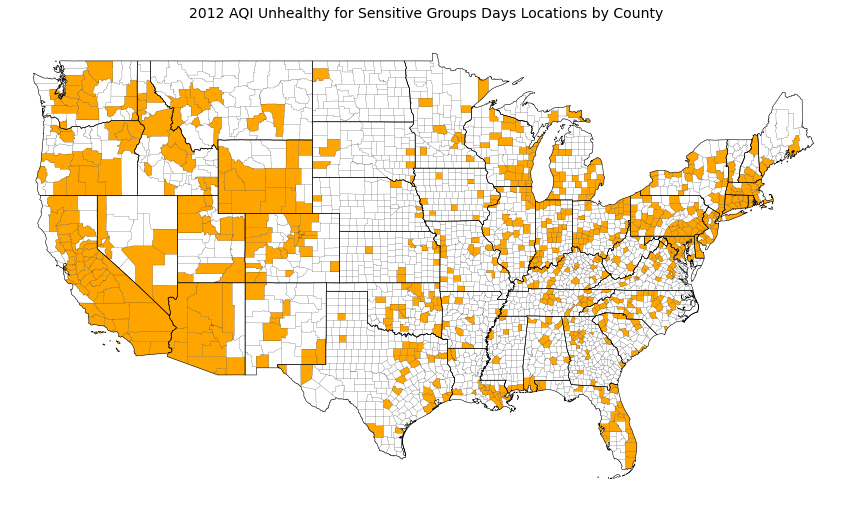

In [90]:
#plot 2012 map of AQI counties with Unhealthy for Sensitive Groups Days
fig = plt.figure(1, figsize=(15,12)) 
ax = fig.add_subplot()
ax.set_title('2012 AQI Unhealthy for Sensitive Groups Days Locations by County', fontsize=14)

# US Lower 48 Bounding Box
# -141.00000, 26.00000, -65.50000, 72.00000

ax.set_xlim(-14100244, -7200000)
ax.set_ylim(2600000, 6550000)
ax.set_axis_off()

ax.set_aspect('equal')

stateMap.boundary.plot(ax=ax, color = 'black', linewidth=0.5)
countyMap.boundary.plot(ax=ax, color = 'black', linewidth=.1)
geo_countyAQI1UnhealthySGroups.plot(ax = ax, color='orange')

In [91]:
plt.close()

In [92]:
geo_countyAQI2UnhealthySGroups = geo_countyAQI2[geo_countyAQI2['Unhealthy for Sensitive Groups Days'] >= 1]
geo_countyAQI2UnhealthySGroups.sort_values('Unhealthy for Sensitive Groups Days', ascending = False)

STATEFP COUNTYFP  GEOID           County  \
574      29      143  29143       New Madrid   
634      06      107  06107           Tulare   
561      06      065  06065        Riverside   
753      06      029  06029             Kern   
101      06      071  06071   San Bernardino   
..      ...      ...    ...              ...   
498      44      003  44003             Kent   
500      47      165  47165           Sumner   
501      17      065  17065         Hamilton   
503      24      033  24033  Prince George's   
499      27      053  27053         Hennepin   

                                              geometry         State  Year  \
574  POLYGON Z ((-10015690.436 4329011.303 0.000, -...      Missouri  2020   
634  POLYGON Z ((-13307810.644 4345462.231 0.000, -...    California  2020   
561  POLYGON Z ((-13099664.236 3990058.313 0.000, -...    California  2020   
753  POLYGON Z ((-13379951.129 4246665.911 0.000, -...    California  2020   
101  POLYGON Z ((-13111773.125 4005551.882 0.000, -...    California  2020   
..                                                 ...           ...   ...   
498  POLYGON Z ((-7991589.683 5091364.525 0.000, -7...  Rhode Island  2020   
500  POLYGON Z ((-9656773.912 4333009.008 0.000, -9...     Tennessee  2020   
501  POLYGON Z ((-9874551.571 4570743.571 0.000, -9...      Illinois  2020   
503  POLYGON Z ((-8580450.579 4653421.814 0.000, -8...      Maryland  2020   
499  POLYGON Z ((-10438073.320 5600292.750 0.000, -...     Minnesota  2020   

     Days with AQI  Good Days  Moderate Days  ...  Hazardous Days  Max AQI  \
574            366         59             74  ...               0      200   
634            366         79            156  ...               0      209   
561            366         53            168  ...               2      576   
753            366         78            159  ...               0      267   
101            366         50            153  ...               0      236   
..             ...        ...            ...  ...             ...      ...   
498            358        339             18  ...               0      133   
500            360        316             43  ...               0      121   
501            353        275             77  ...               0      118   
503            366        333             32  ...               0      105   
499            366        275             89  ...               0      156   

     90th Percentile AQI  Median AQI  Days CO  Days NO2  Days Ozone  Days SO2  \
574                  168         117        0         0           0       366   
634                  143          78        0         0         188         0   
561                  159          87        0         0         224         0   
753                  140          81        0         0         206         0   
101                  185          93        0        17         228         0   
..                   ...         ...      ...       ...         ...       ...   
498                   47          31        0         0         190         0   
500                   52          37        0         0         193         0   
501                   56          40        0         0         154         0   
503                   50          37        0         4         307         0   
499                   57          38        0        14          32         0   

     Days PM2.5  Days PM10  
574           0          0  
634         162         16  
561         103         39  
753         143         17  
101         106         15  
..          ...        ...  
498         168          0  
500         167          0  
501         199          0  
503          55          0  
499         220        100  

[475 rows x 23 columns]

<AxesSubplot:title={'center':'2020 AQI Unhealthy for Sensitive Groups Days Locations by County'}>

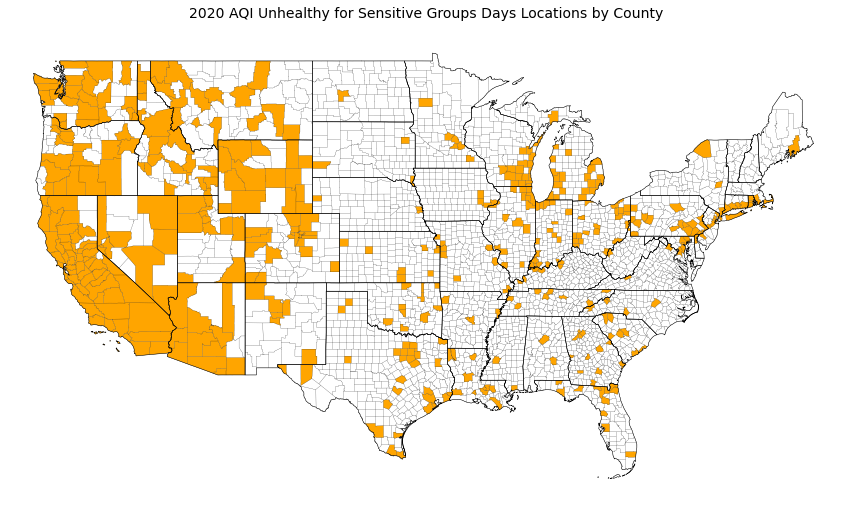

In [93]:
#plot 2020 map of AQI counties with Unhealthy for Sensitive Groups Days
fig = plt.figure(1, figsize=(15,12)) 
ax = fig.add_subplot()
ax.set_title('2020 AQI Unhealthy for Sensitive Groups Days Locations by County', fontsize=14)

# US Lower 48 Bounding Box
# -141.00000, 26.00000, -65.50000, 72.00000

ax.set_xlim(-14100244, -7200000)
ax.set_ylim(2600000, 6550000)
ax.set_axis_off()

ax.set_aspect('equal')

stateMap.boundary.plot(ax=ax, color = 'black', linewidth=0.5)
countyMap.boundary.plot(ax=ax, color = 'black', linewidth=.1)
geo_countyAQI2UnhealthySGroups.plot(ax = ax, color='orange')

In [94]:
plt.close()

### What does a map of AQI look like?

Map median AQI by state for 1999, 2012, and 2020 

In [95]:
#extract median AQI column, groupby State, and get the mean, round to 2 decimal places 
#then convert to df
mnAQI0 = AQI0Cleaned['Median AQI'].groupby(AQI0Cleaned['State']).mean().round(2)

In [96]:
#convert to dataframe
dAQI0 = pd.DataFrame(mnAQI0.to_frame().reset_index())

In [97]:
#merge dQAI0 with df from shapefile (stateMap)
geo_mergeAQI0 = stateMap.merge(dAQI0, left_on='NAME', right_on='State')

<AxesSubplot:title={'center':'Median AQI by State, 1999'}>

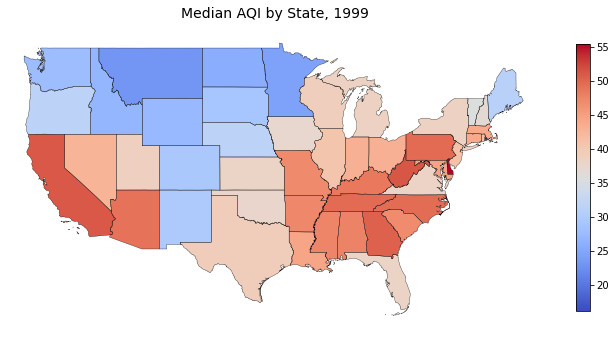

In [98]:
#plot 1999 map
fig = plt.figure(1, figsize=(12,7)) 
ax = fig.add_subplot()
ax.set_title('Median AQI by State, 1999', fontsize = 14)

# US Lower 48 Bounding Box
# -141.00000, 26.00000, -65.50000, 72.00000

ax.set_xlim(-14100244, -7200000)
ax.set_ylim(2600000, 6550000)
ax.set_axis_off()

stateMap.boundary.plot(ax=ax, color = 'black', linewidth=.3)
geo_mergeAQI0.plot(ax = ax, column='Median AQI', cmap='coolwarm', legend=True, 
                   legend_kwds={'orientation': "vertical", "shrink": 0.70})


In [99]:
plt.close()

In [100]:
#repeat for 2012 and 2020

In [101]:
mnAQI1 = AQI1Cleaned['Median AQI'].groupby(AQI1Cleaned['State']).mean().round(2)
dAQI1 = pd.DataFrame(mnAQI1.to_frame().reset_index())
geo_mergeAQI1 = stateMap.merge(dAQI1, left_on='NAME', right_on='State')

<AxesSubplot:title={'center':'Median AQI by State, 2012'}>

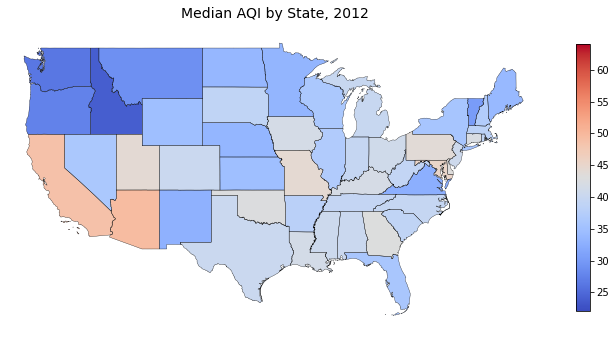

In [102]:
#plot 2012 map
fig = plt.figure(1, figsize=(12,7)) 
ax = fig.add_subplot()
ax.set_title('Median AQI by State, 2012', fontsize = 14)

# US Lower 48 Bounding Box
# -141.00000, 26.00000, -65.50000, 72.00000

ax.set_xlim(-14100244, -7200000)
ax.set_ylim(2600000, 6550000)
ax.set_axis_off()

stateMap.boundary.plot(ax=ax, color = 'black', linewidth=.3)
geo_mergeAQI1.plot(ax = ax, column='Median AQI', cmap='coolwarm', legend=True, 
                   legend_kwds={'orientation': "vertical", "shrink": 0.70})


In [103]:
plt.close()

In [104]:
mnAQI2 = AQI2Cleaned['Median AQI'].groupby(AQI2Cleaned['State']).mean().round(2)
dAQI2 = pd.DataFrame(mnAQI2.to_frame().reset_index())
geo_mergeAQI2 = stateMap.merge(dAQI2, left_on='NAME', right_on='State')

<AxesSubplot:title={'center':'Median AQI by State, 2020'}>

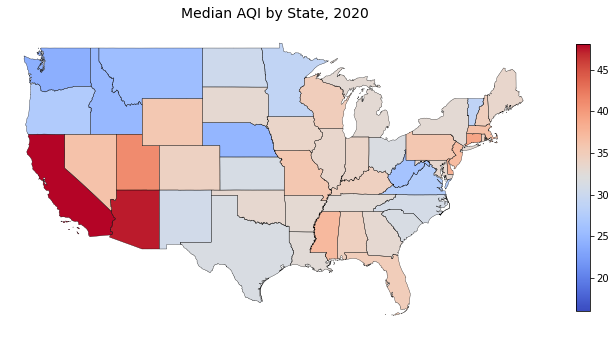

In [105]:
#plot 2020 map
fig = plt.figure(1, figsize=(12,7)) 
ax = fig.add_subplot()
ax.set_title('Median AQI by State, 2020', fontsize = 14)

# US Lower 48 Bounding Box
# -141.00000, 26.00000, -65.50000, 72.00000

ax.set_xlim(-14100244, -7200000)
ax.set_ylim(2600000, 6550000)
ax.set_axis_off()

stateMap.boundary.plot(ax=ax, color = 'black', linewidth=.3)
geo_mergeAQI2.plot(ax = ax, column='Median AQI', cmap='coolwarm', legend=True, 
                   legend_kwds={'orientation': "vertical", "shrink": 0.70})


In [106]:
plt.close()

Map U.S. median AQI by county for 1999, 2012, and 2020 

In [107]:
geo_countyAQI0.sort_values('Median AQI', ascending=False)

STATEFP COUNTYFP  GEOID          County  \
772      06      029  06029            Kern   
190      06      019  06019          Fresno   
390      04      013  04013        Maricopa   
88       06      071  06071  San Bernardino   
271      54      029  54029         Hancock   
..      ...      ...    ...             ...   
988      38      055  38055          McLean   
256      55      095  55095            Polk   
656      27      071  27071     Koochiching   
536      26      041  26041           Delta   
662      19      111  19111             Lee   

                                              geometry          State  Year  \
772  POLYGON Z ((-13379951.129 4246665.911 0.000, -...     California  1999   
190  POLYGON Z ((-13431358.915 4406845.465 0.000, -...     California  1999   
390  POLYGON Z ((-12616208.697 3947089.125 0.000, -...        Arizona  1999   
88   POLYGON Z ((-13111773.125 4005551.882 0.000, -...     California  1999   
271  POLYGON Z ((-8979915.897 4923150.683 0.000, -8...  West Virginia  1999   
..                                                 ...            ...   ...   
988  POLYGON Z ((-11397508.960 6049869.699 0.000, -...   North Dakota  1999   
256  POLYGON Z ((-10340257.551 5690439.078 0.000, -...      Wisconsin  1999   
656  POLYGON Z ((-10511933.200 6192152.177 0.000, -...      Minnesota  1999   
536  MULTIPOLYGON Z (((-9650553.044 5688654.152 0.0...       Michigan  1999   
662  POLYGON Z ((-10210088.665 4956944.398 0.000, -...           Iowa  1999   

     Days with AQI  Good Days  Moderate Days  ...  Hazardous Days  Max AQI  \
772            365         62            107  ...               0      207   
190            365         59            106  ...               0      219   
390            365          5            168  ...               0      185   
88             365         16            163  ...               0      239   
271            365         29            151  ...               0      200   
..             ...        ...            ...  ...             ...      ...   
988            365        363              2  ...               0       82   
256             97         97              0  ...               0        9   
656            358        358              0  ...               0       13   
536            365        359              6  ...               0       69   
662            335        330              4  ...               0      107   

     90th Percentile AQI  Median AQI  Days CO  Days NO2  Days Ozone  Days SO2  \
772                  179         108        0        40         240         0   
190                  182         108        7        38         231         0   
390                  140         101        3       125         218         0   
88                   190         101        0        93         206         0   
271                  137         101        0         0          43       302   
..                   ...         ...      ...       ...         ...       ...   
988                   19           3        0         0           0       323   
256                    7           3       97         0           0         0   
656                    4           1        0         0           0       358   
536                   29           0        0         0           0       365   
662                   11           0        0         0           0       335   

     Days PM2.5  Days PM10  
772          81          4  
190          89          0  
390           7         12  
88           61          5  
271          19          1  
..          ...        ...  
988           0         42  
256           0          0  
656           0          0  
536           0          0  
662           0          0  

[1025 rows x 23 columns]

<AxesSubplot:title={'center':'1999 Median AQI by County'}>

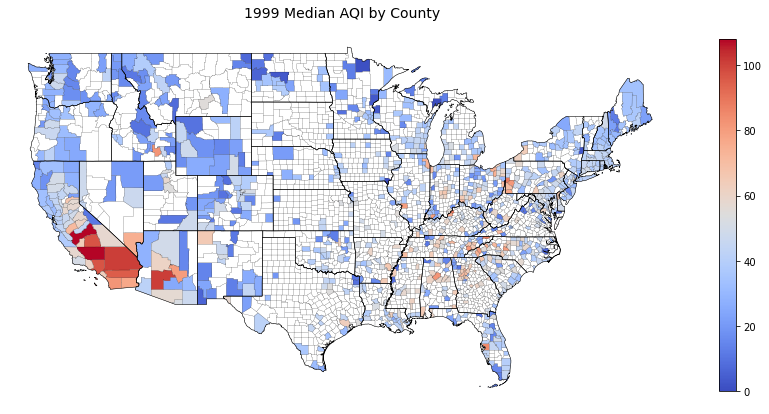

In [108]:
#plot 1999 map
fig = plt.figure(1, figsize=(15,12)) 
ax = fig.add_subplot()
ax.set_title('1999 Median AQI by County', fontsize=14)

# US Lower 48 Bounding Box
# -141.00000, 26.00000, -65.50000, 72.00000

ax.set_xlim(-14100244, -7200000)
ax.set_ylim(2600000, 6550000)
ax.set_axis_off()

ax.set_aspect('equal')


stateMap.boundary.plot(ax=ax, color = 'black', linewidth=.5)
countyMap.boundary.plot(ax=ax, color = 'black', linewidth=.1)
geo_countyAQI0.plot(ax = ax, column='Median AQI', cmap='coolwarm', legend=True, 
                  legend_kwds={'orientation': "vertical", "shrink": 0.54})

In [109]:
plt.close()

In [110]:
geo_countyAQI1.sort_values('Median AQI', ascending=False)

STATEFP COUNTYFP  GEOID          County  \
622      15      001  15001          Hawaii   
578      06      065  06065       Riverside   
166      04      007  04007            Gila   
101      06      071  06071  San Bernardino   
303      08      019  08019     Clear Creek   
..      ...      ...    ...             ...   
903      12      089  12089          Nassau   
737      16      029  16029         Caribou   
329      37      013  37013        Beaufort   
608      39      105  39105           Meigs   
947      56      045  56045          Weston   

                                              geometry           State  Year  \
622  POLYGON Z ((-17372210.805 2228128.372 0.000, -...          Hawaii  2012   
578  POLYGON Z ((-13099664.236 3990058.313 0.000, -...      California  2012   
166  POLYGON Z ((-12436694.552 4026542.710 0.000, -...         Arizona  2012   
101  POLYGON Z ((-13111773.125 4005551.882 0.000, -...      California  2012   
303  POLYGON Z ((-11791474.538 4794995.472 0.000, -...        Colorado  2012   
..                                                 ...             ...   ...   
903  POLYGON Z ((-9133814.759 3568980.268 0.000, -9...         Florida  2012   
737  POLYGON Z ((-12484457.738 5267002.136 0.000, -...           Idaho  2012   
329  POLYGON Z ((-8592280.056 4237182.459 0.000, -8...  North Carolina  2012   
608  POLYGON Z ((-9164140.414 4698726.044 0.000, -9...            Ohio  2012   
947  POLYGON Z ((-11697372.054 5462960.451 0.000, -...         Wyoming  2012   

     Days with AQI  Good Days  Moderate Days  ...  Hazardous Days  Max AQI  \
622            366          0             27  ...               1      322   
578            366         21            178  ...               0      233   
166            366         53            154  ...               0      200   
101            366         50            173  ...               0      207   
303            104          9             58  ...               0      179   
..             ...        ...            ...  ...             ...      ...   
903            361        342             17  ...               0      119   
737            361        359              1  ...               0      112   
329            352        352              0  ...               0       40   
608            364        364              0  ...               0       49   
947            323        323              0  ...               0       44   

     90th Percentile AQI  Median AQI  Days CO  Days NO2  Days Ozone  Days SO2  \
622                  200         171        0         0           0       358   
578                  156          94        0         1         185         0   
166                  132          92        0         0          81       251   
101                  169          90        0        17         227         0   
303                  122          90        0         0         104         0   
..                   ...         ...      ...       ...         ...       ...   
903                   37           4        0         0           0       361   
737                   21           4        0         0           0       361   
329                   16           3        0         0           0       352   
608                   13           3        0         0           0       364   
947                   35           0        0         0          43       280   

     Days PM2.5  Days PM10  
622           8          0  
578         136         44  
166           1         33  
101         113          9  
303           0          0  
..          ...        ...  
903           0          0  
737           0          0  
329           0          0  
608           0          0  
947           0          0  

[1025 rows x 23 columns]

<AxesSubplot:title={'center':'2012 Median AQI by County'}>

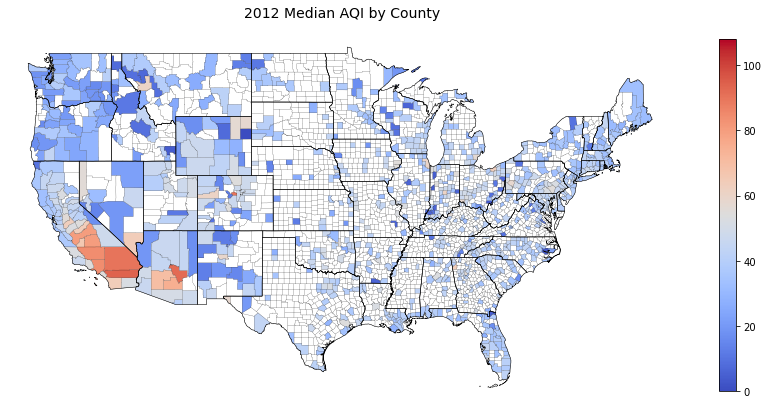

In [111]:
#set vmax to the same as the 1999 map for comparison 
#plot 2012 map
fig = plt.figure(1, figsize=(15,12)) 
ax = fig.add_subplot()
ax.set_title('2012 Median AQI by County', fontsize=14)

# US Lower 48 Bounding Box
# -141.00000, 26.00000, -65.50000, 72.00000

ax.set_xlim(-14100244, -7200000)
ax.set_ylim(2600000, 6550000)
ax.set_axis_off()

ax.set_aspect('equal')


stateMap.boundary.plot(ax=ax, color = 'black', linewidth=.5)
countyMap.boundary.plot(ax=ax, color = 'black', linewidth=.1)
geo_countyAQI1.plot(ax = ax, column='Median AQI', cmap='coolwarm', legend=True, vmax = 108,
                  legend_kwds={'orientation': "vertical", "shrink": 0.54})

In [112]:
plt.close()

In [113]:
geo_countyAQI2.sort_values('Median AQI', ascending=False)

STATEFP COUNTYFP  GEOID          County  \
574      29      143  29143      New Madrid   
399      04      013  04013        Maricopa   
101      06      071  06071  San Bernardino   
561      06      065  06065       Riverside   
291      06      037  06037     Los Angeles   
..      ...      ...    ...             ...   
729      37      019  37019       Brunswick   
102      55      085  55085          Oneida   
357      18      027  18027         Daviess   
453      48      449  48449           Titus   
745      48      395  48395       Robertson   

                                              geometry           State  Year  \
574  POLYGON Z ((-10015690.436 4329011.303 0.000, -...        Missouri  2020   
399  POLYGON Z ((-12616208.697 3947089.125 0.000, -...         Arizona  2020   
101  POLYGON Z ((-13111773.125 4005551.882 0.000, -...      California  2020   
561  POLYGON Z ((-13099664.236 3990058.313 0.000, -...      California  2020   
291  MULTIPOLYGON Z (((-13202867.311 3935367.958 0....      California  2020   
..                                                 ...             ...   ...   
729  POLYGON Z ((-8754421.459 3999360.927 0.000, -8...  North Carolina  2020   
102  POLYGON Z ((-10023785.590 5720521.028 0.000, -...       Wisconsin  2020   
357  POLYGON Z ((-9715900.035 4651012.944 0.000, -9...         Indiana  2020   
453  POLYGON Z ((-10589316.767 3923598.713 0.000, -...           Texas  2020   
745  POLYGON Z ((-10778968.444 3624434.486 0.000, -...           Texas  2020   

     Days with AQI  Good Days  Moderate Days  ...  Hazardous Days  Max AQI  \
574            366         59             74  ...               0      200   
399            366         14            151  ...               0      282   
101            366         50            153  ...               0      236   
561            366         53            168  ...               2      576   
291            366         60            170  ...               0      235   
..             ...        ...            ...  ...             ...      ...   
729            333        320             13  ...               0      100   
102            337        333              4  ...               0       72   
357            361        361              0  ...               0       19   
453            349        349              0  ...               0       36   
745            323        323              0  ...               0       29   

     90th Percentile AQI  Median AQI  Days CO  Days NO2  Days Ozone  Days SO2  \
574                  168         117        0         0           0       366   
399                  215         112        0         0         273         0   
101                  185          93        0        17         228         0   
561                  159          87        0         0         224         0   
291                  164          83        0        23         209         0   
..                   ...         ...      ...       ...         ...       ...   
729                   34           0        0         0           0       333   
102                   11           0        0         0           0       337   
357                    4           0        0         0           0       361   
453                    7           0        0         0           0       349   
745                    1           0        0         0           0       323   

     Days PM2.5  Days PM10  
574           0          0  
399          55         38  
101         106         15  
561         103         39  
291         129          5  
..          ...        ...  
729           0          0  
102           0          0  
357           0          0  
453           0          0  
745           0          0  

[996 rows x 23 columns]

<AxesSubplot:title={'center':'2020 Median AQI by County'}>

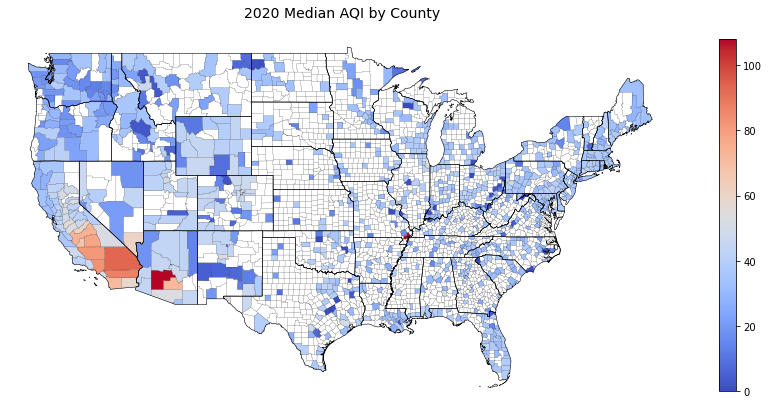

In [114]:
#set vmax to the same as the 1999 map for comparison 
#plot 2020 map
fig = plt.figure(1, figsize=(15,12)) 
ax = fig.add_subplot()
ax.set_title('2020 Median AQI by County', fontsize=14)

# US Lower 48 Bounding Box
# -141.00000, 26.00000, -65.50000, 72.00000

ax.set_xlim(-14100244, -7200000)
ax.set_ylim(2600000, 6550000)
ax.set_axis_off()

ax.set_aspect('equal')


stateMap.boundary.plot(ax=ax, color = 'black', linewidth=.5)
countyMap.boundary.plot(ax=ax, color = 'black', linewidth=.1)
geo_countyAQI2.plot(ax = ax, column='Median AQI', cmap='coolwarm', legend=True, vmax = 108,
                  legend_kwds={'orientation': "vertical", "shrink": 0.54})

In [115]:
plt.close()

In [116]:
#merge
geo_county1999 = countyMap.merge(AQI0Cleaned, on=['State', 'County']).dropna(axis=0).sort_values(by='Median AQI',ascending=False).reset_index()
geo_county1999.head()

index STATEFP COUNTYFP  GEOID          County  \
0    772      06      029  06029            Kern   
1    190      06      019  06019          Fresno   
2    390      04      013  04013        Maricopa   
3     88      06      071  06071  San Bernardino   
4    271      54      029  54029         Hancock   

                                            geometry          State  Year  \
0  POLYGON Z ((-13379951.129 4246665.911 0.000, -...     California  1999   
1  POLYGON Z ((-13431358.915 4406845.465 0.000, -...     California  1999   
2  POLYGON Z ((-12616208.697 3947089.125 0.000, -...        Arizona  1999   
3  POLYGON Z ((-13111773.125 4005551.882 0.000, -...     California  1999   
4  POLYGON Z ((-8979915.897 4923150.683 0.000, -8...  West Virginia  1999   

   Days with AQI  Good Days  ...  Hazardous Days  Max AQI  \
0            365         62  ...               0      207   
1            365         59  ...               0      219   
2            365          5  ...               0      185   
3            365         16  ...               0      239   
4            365         29  ...               0      200   

   90th Percentile AQI  Median AQI  Days CO  Days NO2  Days Ozone  Days SO2  \
0                  179         108        0        40         240         0   
1                  182         108        7        38         231         0   
2                  140         101        3       125         218         0   
3                  190         101        0        93         206         0   
4                  137         101        0         0          43       302   

   Days PM2.5  Days PM10  
0          81          4  
1          89          0  
2           7         12  
3          61          5  
4          19          1  

[5 rows x 24 columns]

In [117]:
len(geo_county1999)

1025

<AxesSubplot:title={'center':'1999 Median AQI by County'}>

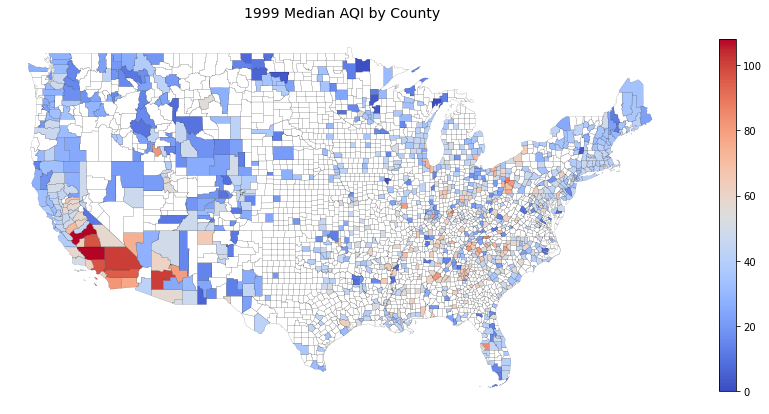

In [118]:
#plot 1999 map
fig = plt.figure(1, figsize=(15,12)) 
ax = fig.add_subplot()
ax.set_title('1999 Median AQI by County', fontsize=14)

# US Lower 48 Bounding Box
# -141.00000, 26.00000, -65.50000, 72.00000

ax.set_xlim(-14100244, -7200000)
ax.set_ylim(2600000, 6550000)
ax.set_axis_off()

#fig.suptitle('1999 Median AQI by County', fontsize=14)
countyMap.boundary.plot(ax=ax, color = 'black', linewidth=.1)
#geo_county1999.plot(ax = ax, column='Median AQI', scheme="quantiles",legend=True,cmap='coolwarm')
geo_county1999.plot(ax = ax, column='Median AQI', cmap='coolwarm', legend=True, 
                   legend_kwds={'orientation': "vertical", "shrink": 0.54})

In [119]:
plt.close()

In [120]:
#merge
geo_county2012 = countyMap.merge(AQI1Cleaned, on=['State', 'County']).dropna(axis=0).sort_values(by='Median AQI',ascending=False).reset_index()
geo_county2012.head()

index STATEFP COUNTYFP  GEOID          County  \
0    622      15      001  15001          Hawaii   
1    578      06      065  06065       Riverside   
2    166      04      007  04007            Gila   
3    101      06      071  06071  San Bernardino   
4    303      08      019  08019     Clear Creek   

                                            geometry       State  Year  \
0  POLYGON Z ((-17372210.805 2228128.372 0.000, -...      Hawaii  2012   
1  POLYGON Z ((-13099664.236 3990058.313 0.000, -...  California  2012   
2  POLYGON Z ((-12436694.552 4026542.710 0.000, -...     Arizona  2012   
3  POLYGON Z ((-13111773.125 4005551.882 0.000, -...  California  2012   
4  POLYGON Z ((-11791474.538 4794995.472 0.000, -...    Colorado  2012   

   Days with AQI  Good Days  ...  Hazardous Days  Max AQI  \
0            366          0  ...               1      322   
1            366         21  ...               0      233   
2            366         53  ...               0      200   
3            366         50  ...               0      207   
4            104          9  ...               0      179   

   90th Percentile AQI  Median AQI  Days CO  Days NO2  Days Ozone  Days SO2  \
0                  200         171        0         0           0       358   
1                  156          94        0         1         185         0   
2                  132          92        0         0          81       251   
3                  169          90        0        17         227         0   
4                  122          90        0         0         104         0   

   Days PM2.5  Days PM10  
0           8          0  
1         136         44  
2           1         33  
3         113          9  
4           0          0  

[5 rows x 24 columns]

In [121]:
len(geo_county2012)

1025

<AxesSubplot:>

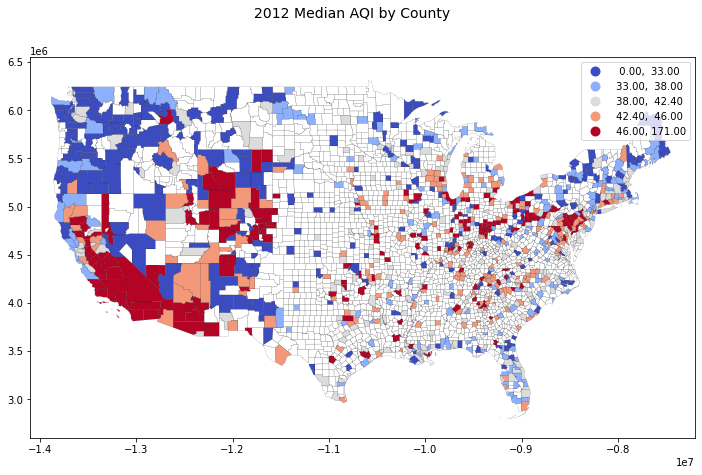

In [122]:
#plot 2012 map
fig = plt.figure(1, figsize=(12,7)) 
ax = fig.add_subplot()

# US Lower 48 Bounding Box
# -141.00000, 26.00000, -65.50000, 72.00000

ax.set_xlim(-14100244, -7200000)
ax.set_ylim(2600000, 6550000)
#ax.set_axis_off()

fig.suptitle('2012 Median AQI by County', fontsize=14)
countyMap.boundary.plot(ax=ax, color = 'black', linewidth=.1)
geo_county2012.plot(ax = ax, column='Median AQI', scheme="quantiles",legend=True, cmap='coolwarm')

In [123]:
plt.close()

In [124]:
#merge 2020 AQI with county map
geo_county2020 = countyMap.merge(AQI2Cleaned, on=['State', 'County']).dropna(axis=0).sort_values(by='Median AQI',ascending=False).reset_index()
geo_county2020.head()

index STATEFP COUNTYFP  GEOID          County  \
0    574      29      143  29143      New Madrid   
1    399      04      013  04013        Maricopa   
2    101      06      071  06071  San Bernardino   
3    561      06      065  06065       Riverside   
4    291      06      037  06037     Los Angeles   

                                            geometry       State  Year  \
0  POLYGON Z ((-10015690.436 4329011.303 0.000, -...    Missouri  2020   
1  POLYGON Z ((-12616208.697 3947089.125 0.000, -...     Arizona  2020   
2  POLYGON Z ((-13111773.125 4005551.882 0.000, -...  California  2020   
3  POLYGON Z ((-13099664.236 3990058.313 0.000, -...  California  2020   
4  MULTIPOLYGON Z (((-13202867.311 3935367.958 0....  California  2020   

   Days with AQI  Good Days  ...  Hazardous Days  Max AQI  \
0            366         59  ...               0      200   
1            366         14  ...               0      282   
2            366         50  ...               0      236   
3            366         53  ...               2      576   
4            366         60  ...               0      235   

   90th Percentile AQI  Median AQI  Days CO  Days NO2  Days Ozone  Days SO2  \
0                  168         117        0         0           0       366   
1                  215         112        0         0         273         0   
2                  185          93        0        17         228         0   
3                  159          87        0         0         224         0   
4                  164          83        0        23         209         0   

   Days PM2.5  Days PM10  
0           0          0  
1          55         38  
2         106         15  
3         103         39  
4         129          5  

[5 rows x 24 columns]

<AxesSubplot:>

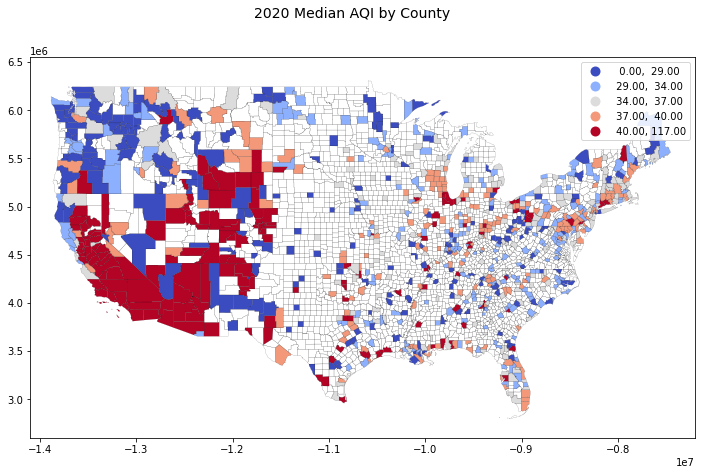

In [125]:
#plot 2020 map
fig = plt.figure(1, figsize=(12,7)) 
ax = fig.add_subplot()

# US Lower 48 Bounding Box
# -141.00000, 26.00000, -65.50000, 72.00000

ax.set_xlim(-14100244, -7200000)
ax.set_ylim(2600000, 6550000)
#ax.set_axis_off()

fig.suptitle('2020 Median AQI by County', fontsize=14)
countyMap.boundary.plot(ax=ax, color = 'black', linewidth=.1)
geo_county2020.plot(ax = ax, column='Median AQI', scheme="quantiles",legend=True,cmap='coolwarm')

In [126]:
plt.close()